# Mental Health in Tech Workplaces
Project for "Programming for Data Science"

In [240]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import colors as mcolors
import matplotlib.ticker as mtik
import seaborn as sb
import streamlit as st
from sklearn import preprocessing
import plotly.express as px


## Context

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. The organization that has collected this data is the "Open Sourcing Mental Health" organization (OSMH).

Open Sourcing Mental Health is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.

## Exploration and cleaning of the dataset

### The dataset

In [241]:
mental_health_df_raw = pd.read_csv('https://raw.githubusercontent.com/EmmaTosato/Programming_Project/main/survey.csv')

### Useful informations

- In this dataset there are 1259 rows and 27 columnes (attributes)

- The age column has integer values

- All the other attribitues have object values

In [242]:
mental_health_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

### Meaning of the columns


The first 4 columns (2 to 5) concern general informations about the individuals. Every attribute contains answers to a specific question.

* **Timestamp:** contains date, month, year and time

* **Age**

* **Gender**

* **Country**

* **state:** If you live in the United States, which state or territory do you live in?

* **self_employed:** Are you self-employed?

* **family_history:** Do you have a family history of mental illness?

* **treatment:** Have you sought treatment for a mental health condition?

* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?

* **no_employees:** How many employees does your company or organization have?

* **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?

* **tech_company:** Is your employer primarily a tech company/organization?

* **benefits:** Does your employer provide mental health benefits?

* **care_options:** Do you know the options for mental health care your employer provides?

* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?

* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?

* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

* **leave:** How easy is it for you to take medical leave for a mental health condition?

* **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?

* **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?

* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?

* **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?

* **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?

* **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

* **comments:** Any additional notes or comments


In [243]:
mental_health_df_raw.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Here i converting the column's name to lowercase characters. In this way, manipulating the columns becomes easier.

In [244]:
mental_health_df_raw.columns = mental_health_df_raw.columns.map(str.lower)

### Dropping columns   

- Dropping the *timestamp* column because it isn't useful for the survey 

- Check how many null values in each columns

- Dropping the *comments* column because the are 1095 null values out of 1259 entries 



In [245]:
mental_health_df_raw.isnull().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [246]:
mental_health_df_raw.drop(columns=['timestamp', 'comments'], inplace = True)

- In the *state* column the are too many null values, since there are only USA's states. Even if we focus only on the USA, there are too few people for many states. Thus it would be misleading to say that a certain state is prone to cases of mental illness.

- For these reasons, the column has to be dropped.

In [247]:
mental_health_df_raw['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

Here I want to highlight some important elements about the *countries* column 
- Since almost the 60% percent of the people come from USA (and the 5% from Canada), making certain assumptions about the data by referring to the country of origin could be risky. As in the previus case, we can't say that a country has more case of mental ilness, because the numbers of respondents across countries aren't uniform. 

- I filtered the European countries, in order to have a comparison with the USA. 

- Therfore, selecting only European countries, we can see that the majority of the individuals come from UK. Considering all the other countries (both european and non), there are many that have only one exponent. As before, this variety could be misleading. 

However, keeping in mind this considerations, this column may be useful in some analyses.

In [248]:
mental_health_df_raw['country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [338]:
def group_states(mental_health_df_raw):
    # Grouping states
    eu_states = pd.read_csv('eu_states.csv')

    l_eu = list()
    count_eu = 0
    count_nothing = 0
    cont_usa = 0
    cont_canada = 0
    for i in range(len(mental_health_df_raw)):
        if str(mental_health_df_raw.iloc[i]['country']) in list(eu_states['name']):
            count_eu+=1
            l_eu.append(mental_health_df_raw.iloc[i]['country'])
        elif str(mental_health_df_raw.iloc[i]['country']) == 'United States':
            cont_usa+=1
        elif str(mental_health_df_raw.iloc[i]['country']) == 'Canada':
            cont_canada +=1
        else:
            count_nothing+=1
    return count_eu, cont_usa, cont_canada, count_nothing, l_eu

In [339]:
count_eu, cont_usa, cont_canada, count_nothing, l_eu = group_states(mental_health_df_raw)
print('People from Europe:',count_eu, '\nPeople from USA: ', cont_usa, '\nPeople from Canada: ',cont_canada, '\nPeople from other countries: ',count_nothing)

People from Europe: 357 
People from USA:  746 
People from Canada:  72 
People from other countries:  76


In [340]:
eu_serie = pd.Series(l_eu)
eu_serie.value_counts()

United Kingdom            184
Germany                    45
Netherlands                27
Ireland                    27
France                     13
Sweden                      7
Switzerland                 7
Poland                      7
Italy                       7
Belgium                     6
Bulgaria                    4
Finland                     3
Austria                     3
Croatia                     2
Greece                      2
Denmark                     2
Portugal                    2
Moldova                     1
Norway                      1
Latvia                      1
Hungary                     1
Bosnia and Herzegovina      1
Spain                       1
Romania                     1
Slovenia                    1
Czech Republic              1
dtype: int64

In [251]:
mental_health_df_raw.drop(columns=['state'], inplace = True)

### Cleaning from non sense e null values 

In the *gender* column there are:
- many values that can be grouped under a single label

- non sense values 

- wrong spelled words

In order to clean this attribute, i will group under 'Female':
- female

- cis female that is, those women who are comfortable with their biological gender

- all words that refer to this genre

The same for the 'Male' gender.

For the other genders it's more complicated because the responses aren't clear and the labels are many. For instance, there is difference between transgender and transexual, so the label 'trans' could be incomplete. 

Thus i decided to group all this different cases under the label 'Other'. I understand that could seem hasty, but it's easier for the next analyses.

In [252]:
print('Unique values for the gender column:\n',mental_health_df_raw['gender'].unique())

Unique values for the gender column:
 ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [253]:
# Cleaning the gender column
female_list = ['Female', 'female', 'Cis Female', 'F' , 'Woman', 'f', 'Femake' , 'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail' ]
male_list = ['M','Male','male', 'm' ,'Male-ish', 'maile', 'Cis Male' , 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man','msle','Mail' , 'cis male', 'Malr', 'Cis Man' ]
other_list = ['Trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'Nah', 'All','Enby', 'fluid','Genderqueer', 'Androgyne','Agender', 'Guy (-ish) ^_^','male leaning androgynous', 'Trans woman', 'Neuter','Female (trans)','queer', 'A little about you', 'p', 'ostensibly male, unsure what that really means']

mental_health_df_raw.replace(female_list, 'Female', inplace=True)
mental_health_df_raw.replace(male_list, 'Male', inplace=True)
mental_health_df_raw.replace(other_list, 'Other', inplace=True)

Once the cleaning it's done, it can be seen that the male respondents are four times the females one:

- when considering some assumptions, recall the fact that the male sample is bigger than the female one. So it can not be said, for instance, that male suffer of mental illnes more than females.

- this could mean that the number of men in tech industries is greater than the number of women

In [254]:
print('Unique values of the gender column after the cleaning \n', mental_health_df_raw['gender'].unique())
print('\nLabel counts:')
print(mental_health_df_raw['gender'].value_counts())

Unique values of the gender column after the cleaning 
 ['Female' 'Male' 'Other']

Label counts:
Male      991
Female    247
Other      21
Name: gender, dtype: int64


- In the *age* column there are many meaningless numbers.

- It's possible to see that these numbers are present as uniques values, so i'm going to drop the rows that contain these values.

- Furthermore, i select the age range 18-72 as a valid range for working (it's possible to see that 72 is the max age among the reasonable values)

In [255]:
print('Unique values for the age column:\n', mental_health_df_raw['age'].unique())
print('\n\nFirst 10 min and max values for the age column:')
print('Max values: ', np.sort(list(mental_health_df_raw['age'].nlargest(10))))
print('\nMin values: ', np.sort(list(mental_health_df_raw['age'].nsmallest(10))))

Unique values for the age column:
 [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


First 10 min and max values for the age column:
Max values:  [         57          58          60          60          61          62
          65          72         329 99999999999]

Min values:  [-1726   -29    -1     5     8    11    18    18    18    18]


In [256]:
# Cleaning the age column
mental_health_df_raw.drop(mental_health_df_raw[mental_health_df_raw['age'] < 18].index, inplace= True)
mental_health_df_raw.drop(mental_health_df_raw[mental_health_df_raw['age'] > 72].index, inplace= True)

Cheking the fairness of the data, we see that:

- the avarage age is 32

- the age range is from 18 to 72, although 72 is more of an isolated value. Infact from 18 to 65 all the ages are uniformly present. 

In [257]:
print('Unique values of the age column after the cleaning \n', np.sort(mental_health_df_raw['age'].unique()))
print('\nMin and max age:',mental_health_df_raw['age'].min(),'-',mental_health_df_raw['age'].max() )
print('\nAverage age: ', int(mental_health_df_raw['age'].mean()))

Unique values of the age column after the cleaning 
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65 72]

Min and max age: 18 - 72

Average age:  32


The remaining columns for the cleaning are the *self_employed* and *work_interfere* ones.

- Given that the most of the respondents aren't self employed and the NaN values are 18, i will substitute the null values with the label 'No'. 

- In the second case ( *work_interfere* column, that corrispond to the question: *"If you have a mental health condition, do you feel that it interferes with your work?"*), there are 262 null values and  the most frequent answer is "Sometimes". However, replacing the null values with this label would be misleading for the analysis. Infact it's meaningless to make some kind of avarage in this particular case.

- Then, i decided to replace this NaN values with the label "Don't know". This answer could enclose both for those people who don't have a mental heatlh condition and who have a mental heatlh condition but don't know id it interferes with the work. We will find a plausible solution in the next analysis.

In [258]:
print('NaN values for the column self_employed: ', mental_health_df_raw['self_employed'].isnull().sum() )
print('NaN values for the column work_interfere: ', mental_health_df_raw['work_interfere'].isnull().sum() )

print('\nCounting values for the column self_employed')
print(mental_health_df_raw['self_employed'].value_counts())

print('\nCounting values for the column self_employed')
print(mental_health_df_raw['work_interfere'].value_counts())

NaN values for the column self_employed:  18
NaN values for the column work_interfere:  262

Counting values for the column self_employed
No     1091
Yes     142
Name: self_employed, dtype: int64

Counting values for the column self_employed
Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64


In [259]:
# Cleaning the self_employed column
mental_health_df_raw['self_employed'].fillna(value = 'No', inplace = True)

# Cleaning the work_interfere column
mental_health_df_raw['work_interfere'].fillna(value = 'Don\'t know', inplace = True)

Checking quickly that there are no more wrong or null values in  the columns (except for already checked columns: age, gender and country)

In [260]:
for column in mental_health_df_raw.iloc[:, 3:]:
    print(column, mental_health_df_raw[column].unique())

self_employed ['No' 'Yes']
family_history ['No' 'Yes']
treatment ['Yes' 'No']
work_interfere ['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]
no_employees ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work ['No' 'Yes']
tech_company ['Yes' 'No']
benefits ['Yes' "Don't know" 'No']
care_options ['Not sure' 'No' 'Yes']
wellness_program ['No' "Don't know" 'Yes']
seek_help ['Yes' "Don't know" 'No']
anonymity ['Yes' "Don't know" 'No']
leave ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_health_consequence ['No' 'Maybe' 'Yes']
phys_health_consequence ['No' 'Yes' 'Maybe']
coworkers ['Some of them' 'No' 'Yes']
supervisor ['Yes' 'No' 'Some of them']
mental_health_interview ['No' 'Yes' 'Maybe']
phys_health_interview ['Maybe' 'No' 'Yes']
mental_vs_physical ['Yes' "Don't know" 'No']
obs_consequence ['No' 'Yes']


In [261]:
# Reindexing
mental_health_df_raw.reset_index(drop=True, inplace=True)

The clean dataset

In [262]:
mental_health_df = mental_health_df_raw.copy()

## Interesting plots

### Plots

This code below contains variable, settings and functions useful for every case.

In [263]:
# Useful data
tot_rows = mental_health_df.shape[0]
colors = ['steelblue', 'lightblue']

# Default settings
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams['axes.linewidth'] = 0.5 
plt.rcParams['axes.edgecolor'] = 'black'

# Computing percenteges (without *100)
def percent(df, row): 
	perc = list() 
	for column in df: 
		values = df[column].loc[row] 
		total = df[column].sum() 
		perc.append((round((values/ total),2))) 
	return perc

[]

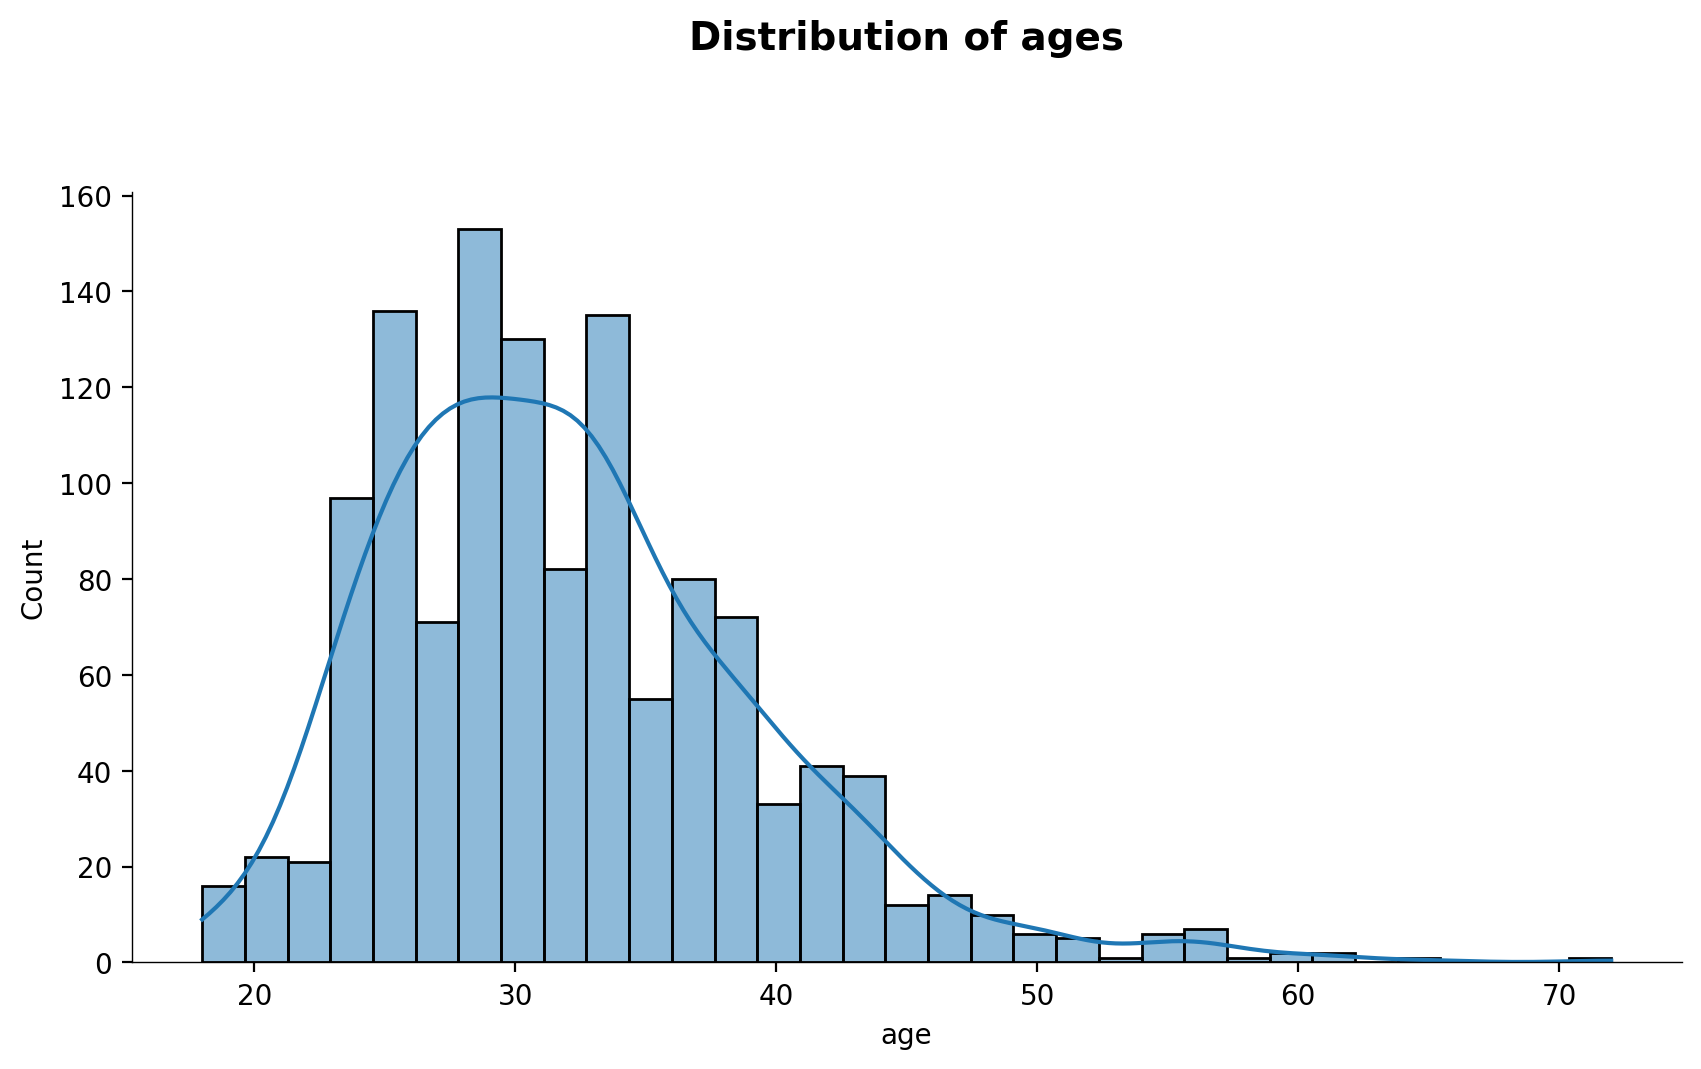

In [353]:
plt.figure(figsize=(10,5))
sb.histplot(mental_health_df['age'],kde=True,)
plt.title("Distribution of ages", fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
plt.plot()


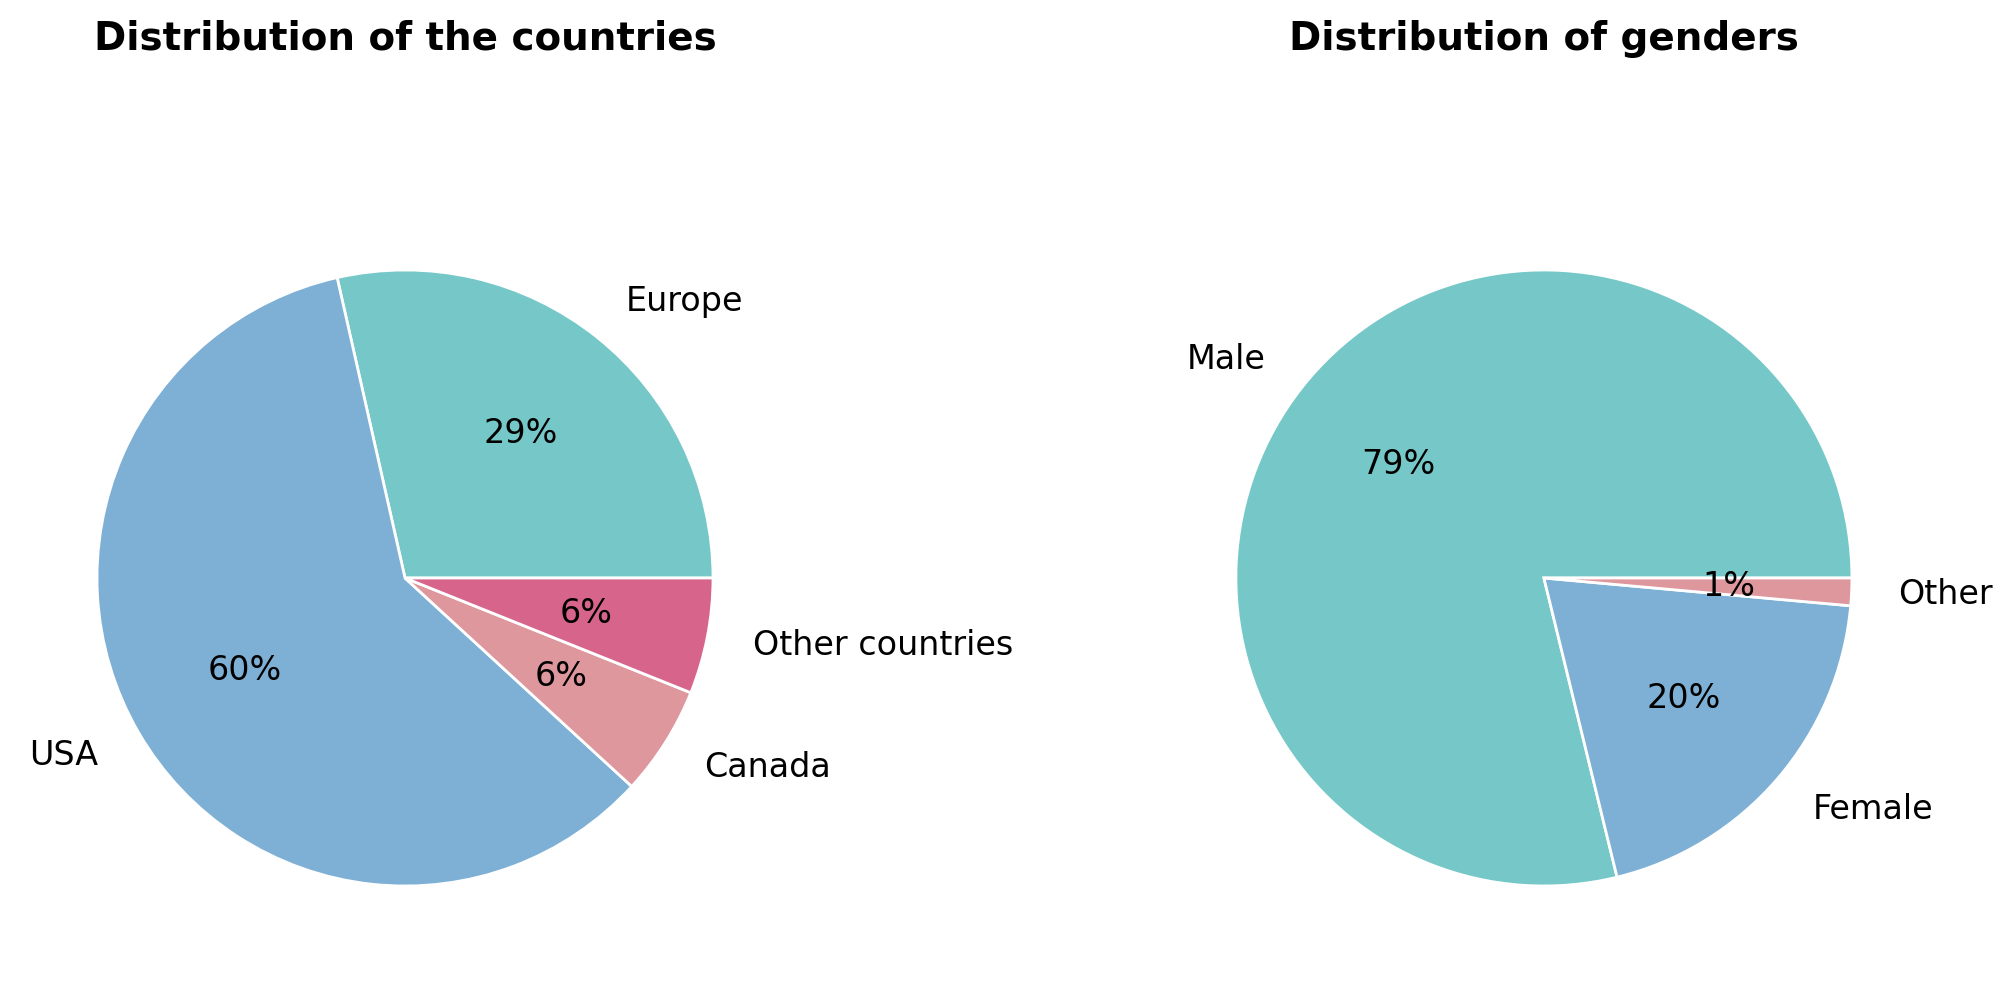

In [354]:
# Data
count_eu, cont_usa, cont_canada, count_nothing, l_eu = group_states(mental_health_df)
cc = [count_eu,  cont_usa, cont_canada, count_nothing]
countries = ['Europe', 'USA', 'Canada', 'Other countries']

counts_gender = mental_health_df['gender'].value_counts().to_list()
labels_gender = mental_health_df['gender'].value_counts().index.to_list()

colors = [ "#76c8c8",  "#7eb0d5", "#df979e", "#d7658b"]

# Plotting
fig1, (ax1, ax2) = plt.subplots(1,2,figsize =(13, 5))
fig1.subplots_adjust(wspace=0.3)

ax1.pie(cc, labels = countries, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors = colors , autopct='%1.0f%%', textprops={'fontsize': 12})
ax2.pie(counts_gender, labels = labels_gender, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors = colors , autopct='%1.0f%%', textprops={'fontsize': 12})        

ax1.set_title('Distribution of the countries', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax2.set_title('Distribution of genders', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
plt.show()

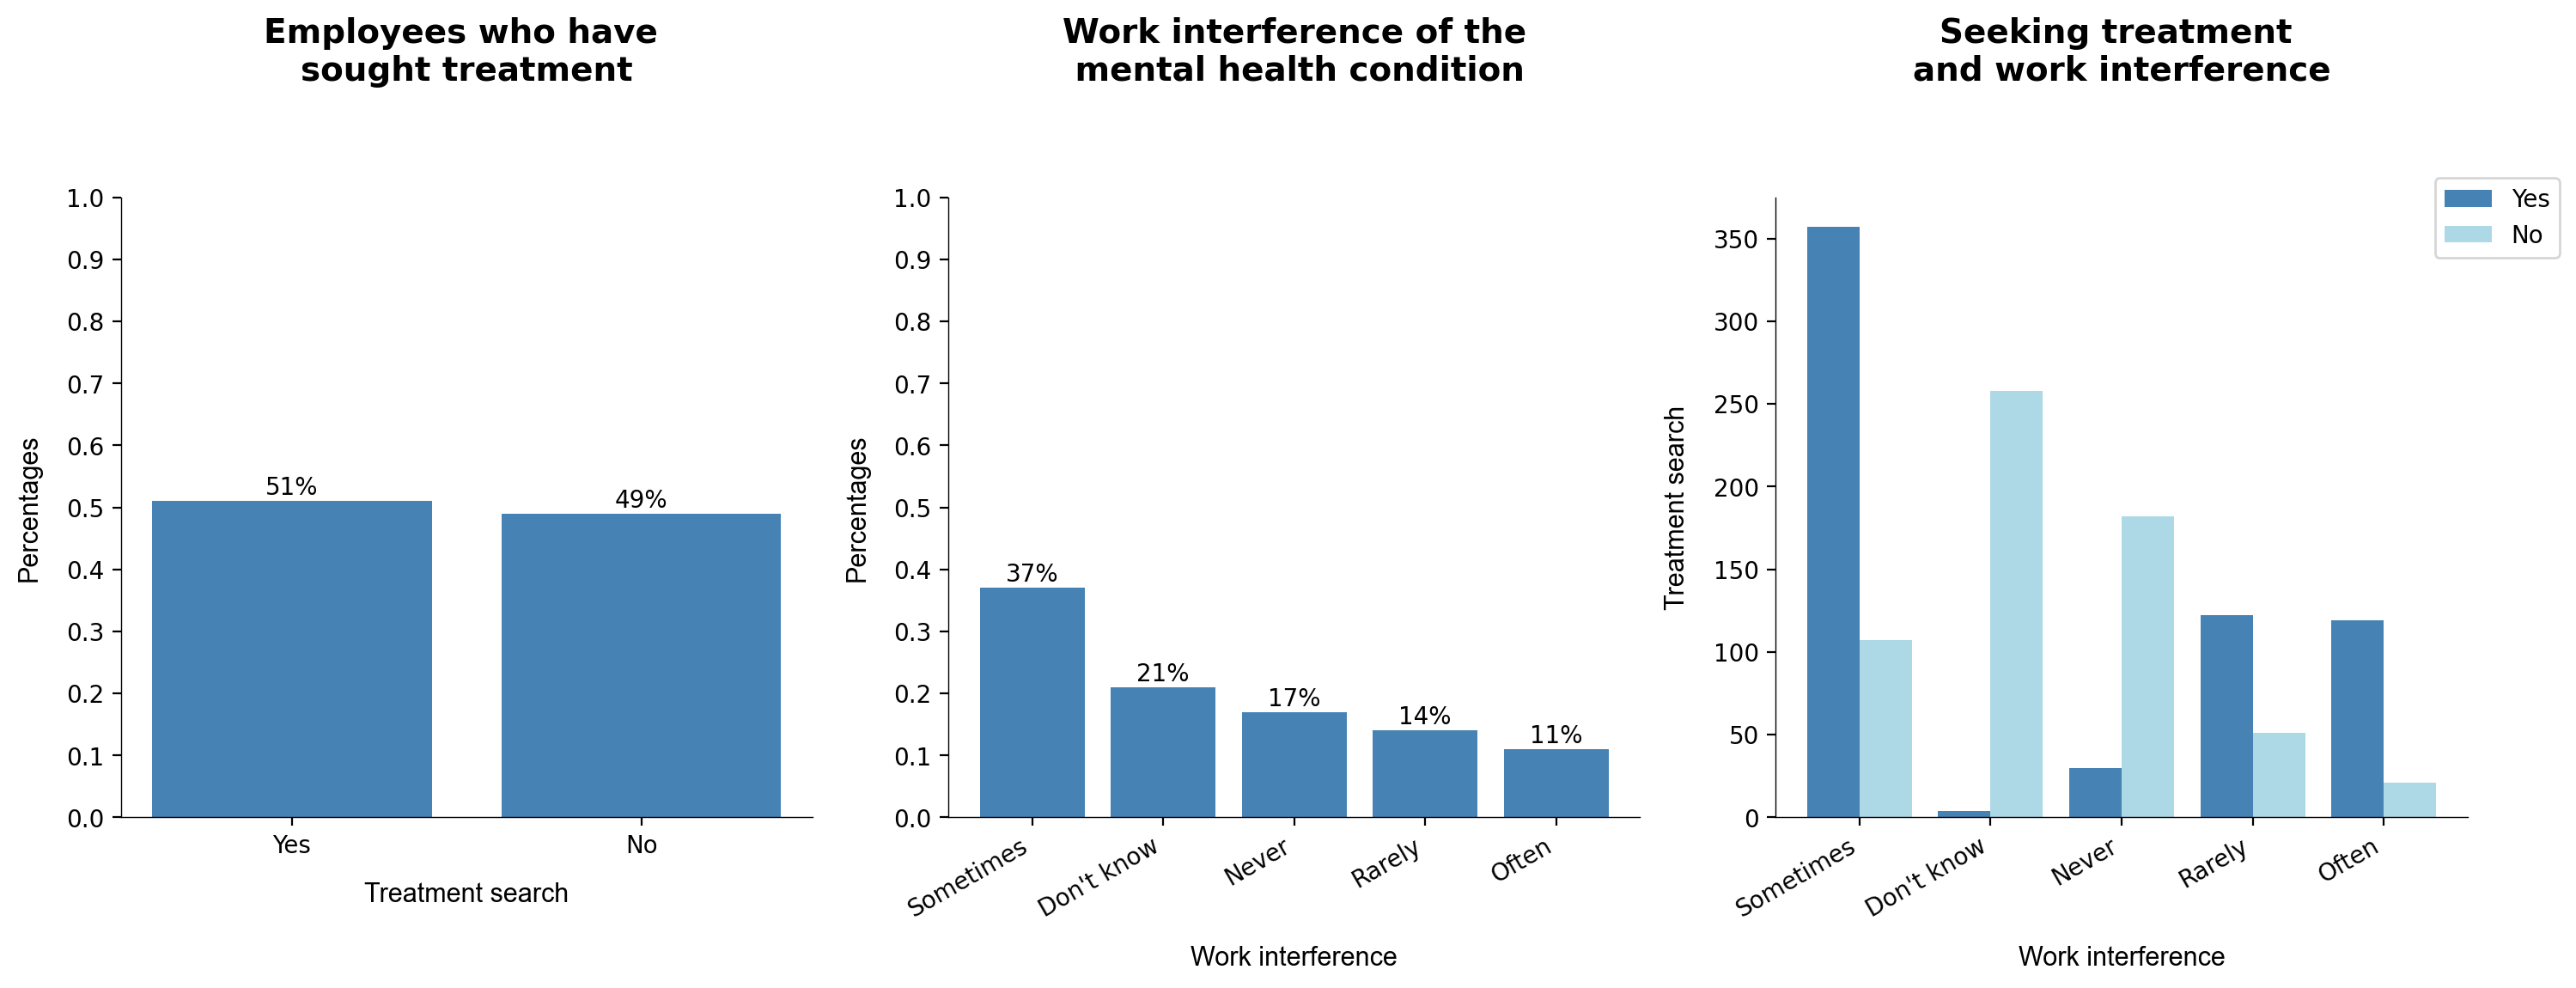

In [265]:
# 1
labels_treat = mental_health_df['treatment'].value_counts().index.to_list()               # Yes, No
counts_treat = list(map(lambda x: round((x/tot_rows),2), mental_health_df['treatment'].value_counts()))

# 2
labels_work = mental_health_df['work_interfere'].value_counts().index.to_list()          # 'Sometimes', "Don't know", 'Never', 'Rarely', 'Often'
counts_work = list(map(lambda x: round((x/tot_rows),2), mental_health_df['work_interfere'].value_counts())) 

# 3
df_treat_work = mental_health_df.groupby(['work_interfere', 'treatment'])['treatment'].count().unstack(0)
df_treat_work = df_treat_work.reindex(index = labels_treat, columns = labels_work)
yes_ans = list(df_treat_work[:].loc['Yes'].values)
no_ans = list(df_treat_work[:].loc['No'].values)


# The label locations
x = np.arange(len(labels_work))  
width = 0.4  # the width of the bars

# Plot
fig1, (ax1, ax2, ax3) = plt.subplots(1,3,figsize =(15, 6))
ax1.bar(labels_treat, counts_treat, color ='steelblue', label=labels_treat)
ax2.bar(labels_work, counts_work, color ='steelblue', label=labels_work)
ax3.bar(x - width/2, yes_ans, width, color= 'steelblue', label= 'Yes')
ax3.bar(x + width/2, no_ans, width, color= 'lightblue', label ='No')

# Labels, ticks 
ax1.set_xlabel("Treatment search", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xlabel("Work interference", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax3.set_xlabel("Work interference", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_ylabel("Percentages", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax3.set_ylabel("Treatment search", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_yticks(np.arange(0.0,1.1, 0.1))
ax2.set_yticks(np.arange(0.0,1.1, 0.1))
ax2.set_xticks(list(range(0,5)), labels_work, rotation=30, ha='right')
ax3.set_xticks(list(range(0,5)), labels_work, rotation=30, ha='right')

# Percenteges
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center')



# Title
ax1.set_title('Employees who have \nsought treatment', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax2.set_title('Work interference of the\n mental health condition', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax3.set_title('Seeking treatment \nand work interference', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)

# Legend
ax3.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# show
plt.tight_layout()
plt.show()

The **first plot** shows the answers to the question, *"Have you sought treatment for a mental health condition?"*

- It's inferred that about half of the respondents have sought treatment for a mental health condtion 

<br>

The **second plot** shows respondent's answer to the question, *"If you have a mental health condition, do you feel that it interferes with your work?"*.
- There is no answer more popular than the others

- Remeber that we have replaced the NaN values with 'Don't know'

- It may not be so simple for the interviewed to admit a mental health condtion and the interference of it with the work, so the *"Sometimes"* response and *"Rarely"* could be vague answers.

<br>

The **third plot** shows counts of people who have sought or not a treatment among each category:

- we see that the people who chose *"Sometimes"* had the highest number of people who actually have sought a treatment for mental health condition. Similar pattern was shown for the people who belonged to the *"Often category"*. Even if the answer was *"Sometimes"* (for the reasons stated above), a lot of people still decided to get help.

- unexpectedly, for people whose mental health *"Never"* has interfered at work, a small percentage still wanted to get treatment. It can be given by a variety of reasons like personal needs, a good capacity of keeping personal life and work spaced out or a preventive gesture.

- practically all of the respondent that didn't answer to the question (the don't know category) aren't seeking a treatment for mental health condition. So probably these people do not suffer from mental illness. Another assumption is that they could be reticent to search a treatment.

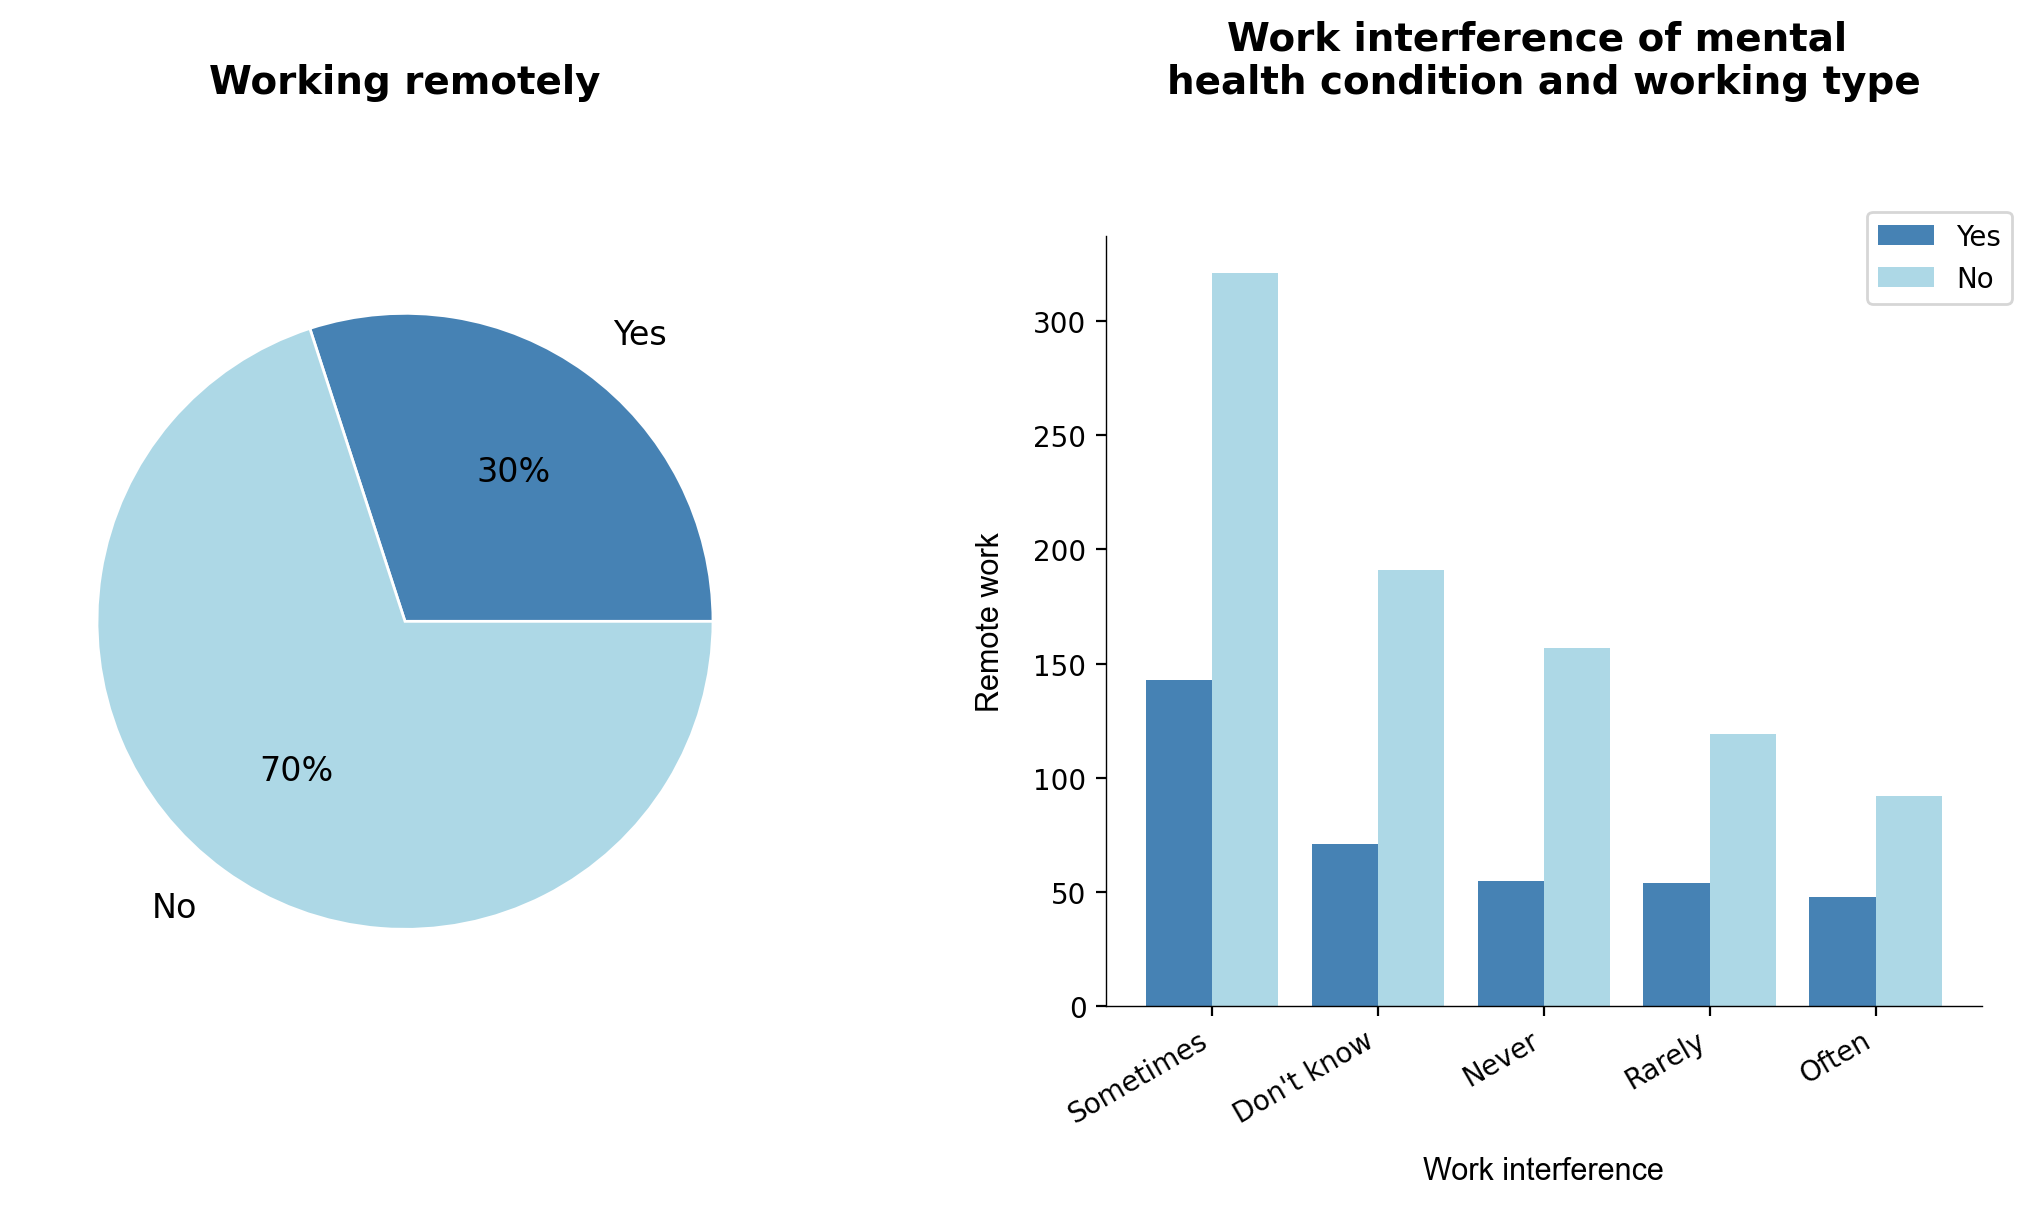

In [266]:
# 1
labels_rw = mental_health_df['remote_work'].value_counts().index.to_list()[::-1]               # Yes, No
counts_rw = list(map(lambda x: round((x/tot_rows),2), mental_health_df['remote_work'].value_counts().reindex(index= labels_rw)))

# 2
labels_work = mental_health_df['work_interfere'].value_counts().index.to_list()          # 'Sometimes', "Don't know", 'Never', 'Rarely', 'Often'
df_rw_interf = mental_health_df.groupby(['work_interfere', 'remote_work'])['remote_work'].count().unstack(0)
df_rw_interf = df_rw_interf.reindex(index = ['Yes', 'No'], columns=labels_work)
yes_ans = list(df_rw_interf[:].loc['Yes'].values)
no_ans = list(df_rw_interf[:].loc['No'].values)



# The label locations
x = np.arange(len(labels_work))  
width = 0.4  # the width of the bars

# Plots
fig1, (ax1, ax2) = plt.subplots(1,2,figsize =(13, 5))
fig1.subplots_adjust(wspace=0.3)

ax1.pie(counts_rw, labels = labels_rw, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors = colors , autopct='%1.0f%%', textprops={'fontsize': 12})
ax2.bar(x - width/2, yes_ans, width, color= 'steelblue', label= 'Yes')
ax2.bar(x + width/2, no_ans, width, color= 'lightblue', label ='No')

# Labels, ticks 
ax2.set_xlabel("Work interference", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_ylabel("Remote work", labelpad= 10.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xticks(list(range(0,5)), labels_work, rotation=30, ha='right')


# Titles
ax1.set_title('Working remotely', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax2.set_title('Work interference of mental \nhealth condition and working type', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)

# Legend
ax2.legend(loc = 'upper right', bbox_to_anchor=(0.55, 0.55, 0.5, 0.5))

# Show
plt.show()

The **first plot** shows the answers to the question, *"Do you work remotely (outside of an office) at least 50% of the time?"*

- the 70% of the interviewed don't work remotely, so we are considering mainly people who suffer of mental health condition and live environment  of the office

<br>

To better understand if the are correlations between the type of working and the interference of a possible mental health condition with the work, look at the **second plot**:

- For every answer, the percentage of people who work in the office is bigger (obviously, given the result of the first plot)

- If we compute the percentages of people who work remotly and in the office for every answer, we find roughly the same percentages (about 30% work remotely and the other 70% in the offic), so there are no particular values to be highlighted


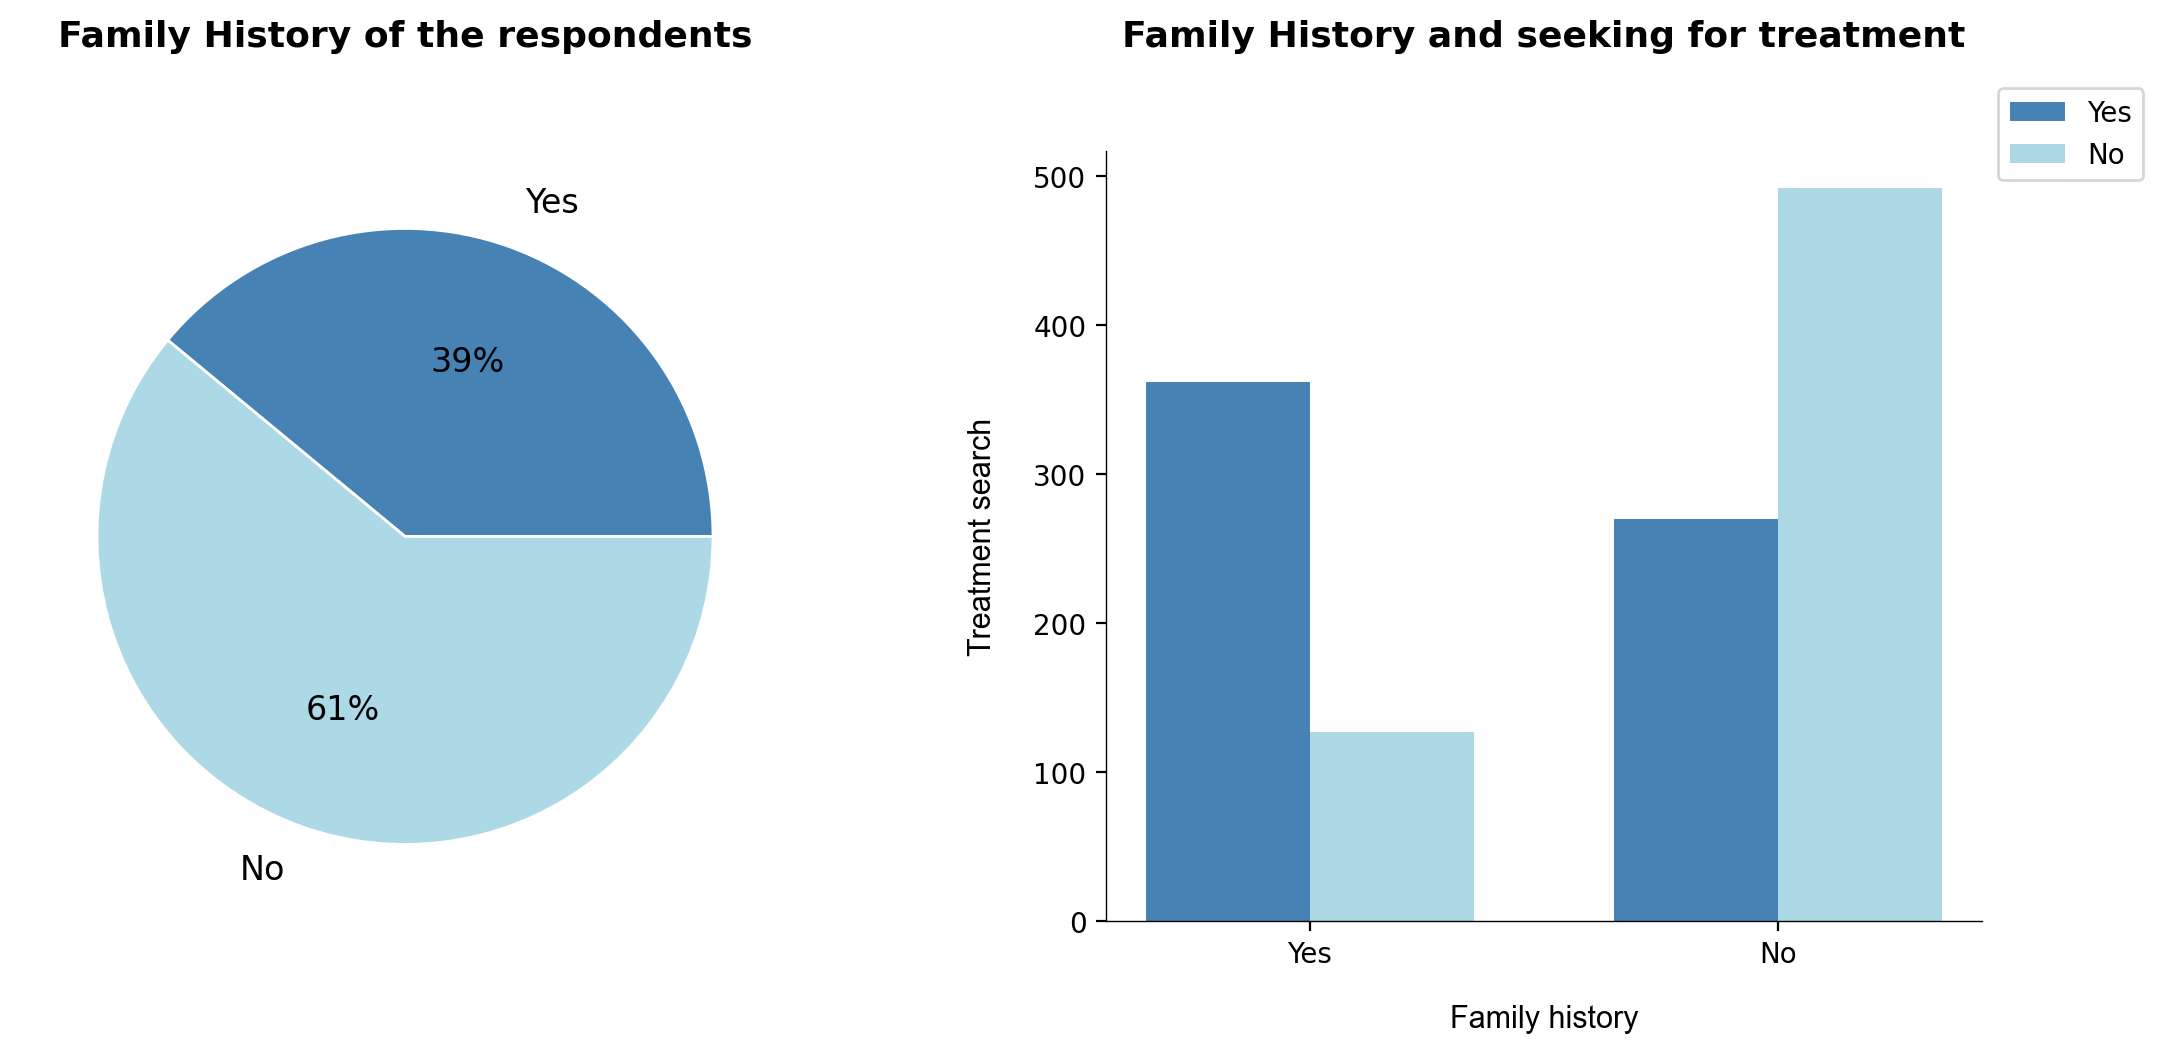

In [267]:
# Data
# 1
labels_ans = list(reversed(mental_health_df['family_history'].value_counts().index.to_list()))                         # Yes, No
reverse_serie = mental_health_df['family_history'].value_counts().reindex(index= mental_health_df['family_history'].value_counts().index[::-1])
counts_ans = list(map(lambda x: round((x/tot_rows),2), reverse_serie))

# 2
df_family = mental_health_df.groupby(['family_history', 'treatment'])['treatment'].count().unstack(0)
df_family = df_family.reindex(index= df_family.index[::-1], columns=df_family.columns[::-1])               
yes_ans = list(df_family[:].loc['Yes'].values)
no_ans = list(df_family[:].loc['No'].values)

# The label locations
x = np.arange(len(labels_ans))  
width = 0.35  

# Plots
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize =(13, 5))
fig1.subplots_adjust(wspace=0.3)

ax1.pie(counts_ans, labels = labels_ans, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors = colors , autopct='%1.0f%%', textprops={'fontsize': 12})
ax2.bar(x - width/2, yes_ans, width, color= 'steelblue', label= 'Yes')
ax2.bar(x + width/2, no_ans, width, color= 'lightblue', label ='No')

# Labels, ticks 
ax2.set_xlabel("Family history", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_ylabel("Treatment search", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xticks(x, labels_ans)

# Titles
ax1.set_title("Family History of the respondents", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)
ax2.set_title("Family History and seeking for treatment", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)

# Legend
ax2.legend(loc = 'upper right', bbox_to_anchor=(0.70, 0.60, 0.5, 0.5))

# Show
plt.show()

The **first plot** shows the answer to the question, *"Do you have a family history of mental illness?"*.

<br>

The **second plot** shows the percentages of respondents who have sought a treatment, given that they came from a family with or without a history in mental illness.

- among who have a family history, the 74 % have sought a treatment while for the ones that don't have a family history, only the 35% have searched treatments.

- this means that peoople who have had cases of mental illness in the family pay more attention to this a topic. Infact, when it comes to mental health/brain health, the family history matters.




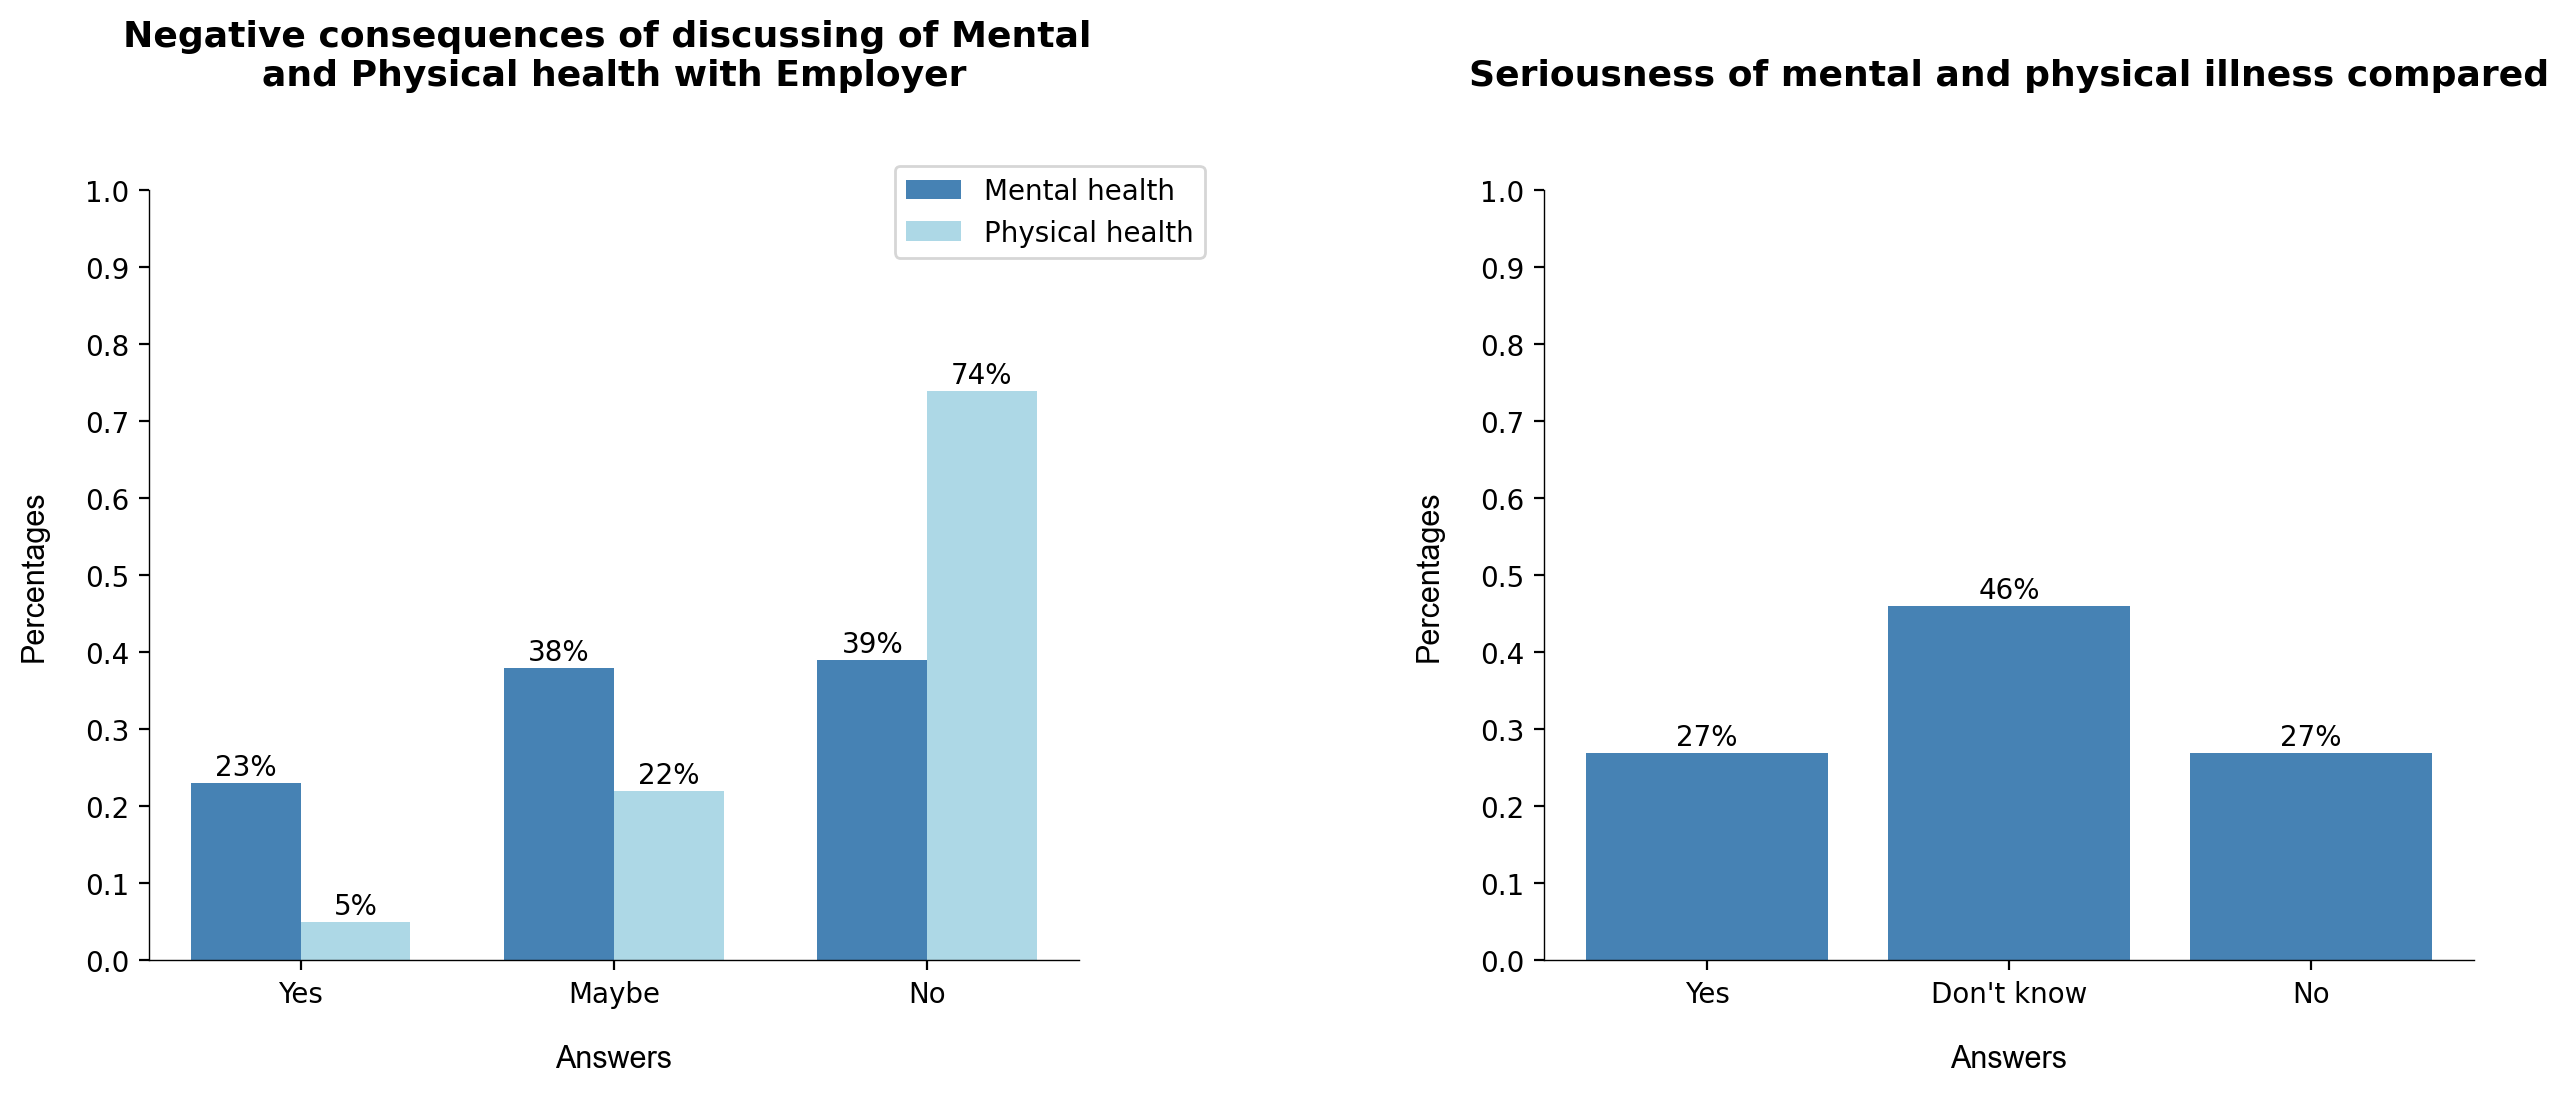

In [268]:
# Data
# 1
mhc = mental_health_df['mental_health_consequence'].value_counts().reindex(index= mental_health_df['mental_health_consequence'].value_counts().index[::-1])
phc = mental_health_df['phys_health_consequence'].value_counts().reindex(index= mental_health_df['phys_health_consequence'].value_counts().index[::-1])

labels = mhc.index.to_list()                 
counts_mhc = list(map(lambda x: round((x/tot_rows),2), mhc))
counts_phc = list(map(lambda x: round((x/tot_rows),2), phc))
  
# 2
label_vs = mental_health_df['mental_vs_physical'].value_counts().reindex(['Yes', 'Don\'t know','No']).index.to_list()
counts_vs = list(map(lambda x: round((x/tot_rows),2), mental_health_df['mental_vs_physical'].value_counts().reindex(label_vs))) 

# The label locations
x = np.arange(len(labels))  
width = 0.35  

# Plots
fig1, (ax1,ax2) = plt.subplots(1,2,figsize =(15, 5))
fig1.subplots_adjust(wspace=0.5)

ax1.bar(x - width/2, counts_mhc, width, color= 'steelblue', label= 'Mental health')
ax1.bar(x + width/2, counts_phc, width, color= 'lightblue', label ='Physical health')
ax2.bar(label_vs, counts_vs, color ='steelblue', label=label_vs)


# Labels, ticks 
ax1.set_xlabel("Answers", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_xlabel("Answers", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax2.set_ylabel("Percentages", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_xticks(x, labels)
ax1.set_yticks(np.arange(0.0, 1.1, 0.1))
ax2.set_yticks(np.arange(0.0, 1.1, 0.1))

# Percentages
for p in ax1.patches:
   height = p.get_height() 
   ax1.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center')

for p in ax2.patches:
   height = p.get_height() 
   ax2.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center')

# Titles
ax1.set_title("Negative consequences of discussing of Mental \nand Physical health with Employer", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)
ax2.set_title("Seriousness of mental and physical illness compared", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)

# Legend
ax1.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# Show
plt.show()

The **first plot** compares the resoponses to these 2 question:
1. "*Do you think that discussing a mental health issue with your employer would have negative consequences?*"
2. "*Do you think that discussing a physical health issue with your employer would have negative consequences?*"

We see that the about the 74% of respondents don't think that discussing a physical health issue would have negative consequences, while only 39% have the same thought for the mental health.
Infact we see that there is more indecision among the respondents for the mental health category.

This highlights how differently mental and physical health are seen and treated. Keeping in mind that this survey took place in 2014, we could say that there are still prejudices on mental health issues in our society, because they are "invisible" and more complex to undestrand. Often there is a stigma against those who suffer of mental health issues, because they are considered weird and dangerous. All of these reasons may therefore explain how talking about a mental problem with the employer could be a negative action.

<br>

The **second plot** shows the respondent's answer to the question, *"Do you feel that your employer takes mental health as seriously as physical health?"*

- this should be a direct way to understand what we tried to infer above

- unfortunately plot is not very informative since about the half of the responses were 'I don't know'

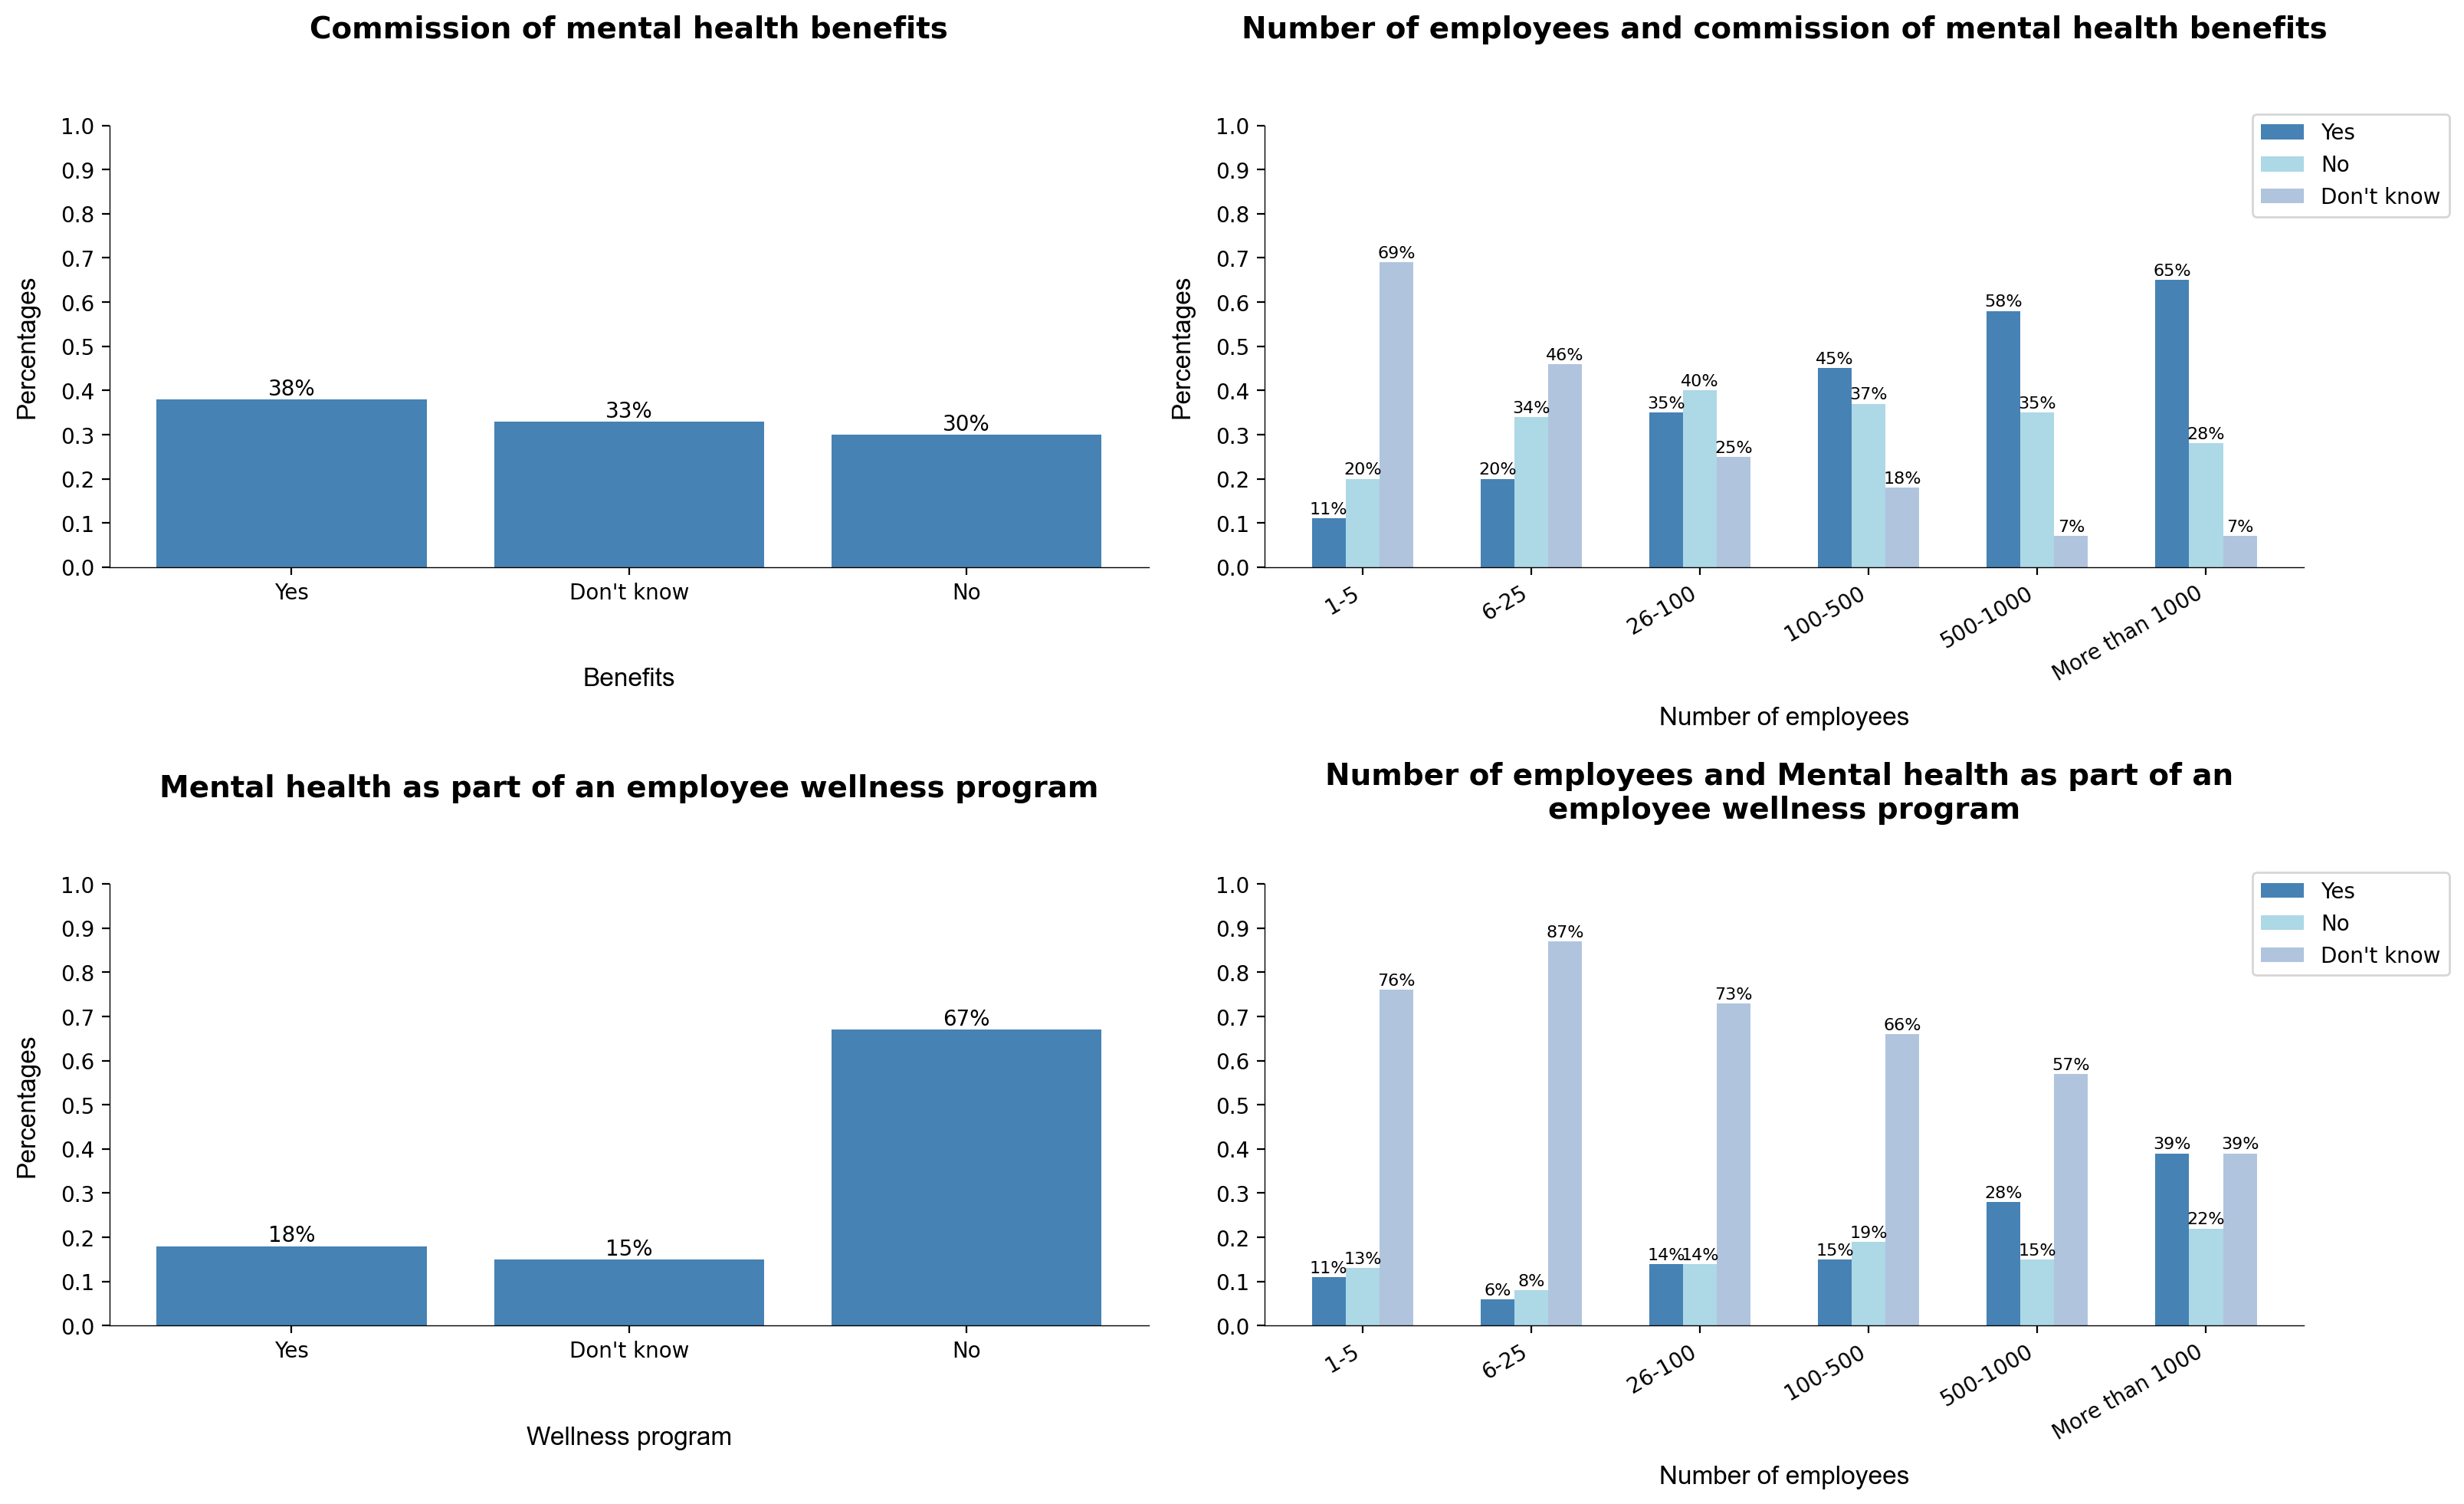

In [269]:
# 1
labels_ben = mental_health_df['benefits'].value_counts().index.to_list()               # 'Yes', "Don't know", 'No'
counts_ben = list(map(lambda x: round((x/tot_rows),2), mental_health_df['benefits'].value_counts()))

# 2
labels_no = [ '1-5', '6-25','26-100',  '100-500' , '500-1000',  'More than 1000']

df_no_ben = mental_health_df.groupby(['no_employees', 'benefits'])['benefits'].count().unstack(0)
df_no_ben = df_no_ben.reindex(index = labels_ben , columns= labels_no)
yes_perc1 = percent(df_no_ben, 'Yes')
no_perc1 = percent(df_no_ben, 'Don\'t know')
idk_perc1 = percent(df_no_ben, 'No')

# 3
labels_well = mental_health_df['wellness_program'].value_counts().reindex(labels_ben).index.to_list()          #'Yes', "Don't know", 'No'
counts_well = list(map(lambda x: round((x/tot_rows),2), mental_health_df['wellness_program'].value_counts().reindex(labels_well))) 

#4
df_no_well = mental_health_df.groupby(['no_employees', 'wellness_program'])['wellness_program'].count().unstack(0)
df_no_well = df_no_well.reindex(index =labels_well , columns= labels_no)
yes_perc2 = percent(df_no_well, 'Yes')
no_perc2 = percent(df_no_well, 'Don\'t know')
idk_perc2 = percent(df_no_well, 'No')


# The label locations
x = np.arange(len(labels_no))  
width = 0.2  # the width of the bars

# Plots
fig1, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize =(16, 10))
ax1.bar(labels_ben, counts_ben, color ='steelblue', label=labels_ben)
ax2.bar(x - 0.2, yes_perc1, width, color= 'steelblue', label= 'Yes')
ax2.bar(x, no_perc1, width, color= 'lightblue', label ='No')
ax2.bar(x + 0.2, idk_perc1, width, color= 'lightsteelblue', label ='Don\'t know')
ax3.bar(labels_well, counts_well, color ='steelblue', label=labels_well)
ax4.bar(x - 0.2, yes_perc2, width, color= 'steelblue', label= 'Yes')
ax4.bar(x, no_perc2, width, color= 'lightblue', label ='No')
ax4.bar(x + 0.2, idk_perc2, width, color= 'lightsteelblue', label ='Don\'t know')

# Labels, ticks 
ax1.set_xlabel("Benefits", labelpad= 30.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax2.set_xlabel("Number of employees", labelpad= 10.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax3.set_xlabel("Wellness program", labelpad= 30.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax4.set_xlabel("Number of employees", labelpad= 10.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 10.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax2.set_ylabel("Percentages", labelpad= 10.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax3.set_ylabel("Percentages", labelpad= 10.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax3.set_ylabel("Percentages", labelpad= 10.0, fontname="Arial", fontsize=12, fontweight = 'medium')
ax2.set_xticks(list(range(0,6)), labels_no, rotation = 30, ha='right')
ax4.set_xticks(list(range(0,6)), labels_no, rotation = 30, ha='right')
ax1.set_yticks(np.arange(0.0,1.1, 0.1))
ax2.set_yticks(np.arange(0.0,1.1, 0.1))
ax3.set_yticks(np.arange(0.0,1.1, 0.1))
ax4.set_yticks(np.arange(0.0,1.1, 0.1))


# Percenteges
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center', fontsize=8)

for p in ax3.patches:
    height = p.get_height()
    ax3.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center')

for p in ax4.patches:
    height = p.get_height()
    ax4.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center', fontsize=8)


# Title
ax1.set_title('Commission of mental health benefits', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax2.set_title('Number of employees and commission of mental health benefits', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax3.set_title('Mental health as part of an employee wellness program', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.15, pad=10)
ax4.set_title('Number of employees and Mental health as part of an \nemployee wellness program', fontsize= 14, fontweight= 'heavy', color = 'black', y=1.10, pad=10)

# Legend
ax2.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))
ax4.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# show
plt.tight_layout()
plt.show()

The **first plot** was the respondent's answer to the question, *"Does your employer provide mental health benefits?"*

- Only the 38% of the respondents said that their employer provided them mental health benefits

<br>

The **third plot** shows the respondents answer to the question, *"Has your employer ever discussed mental health as part of an employee wellness program?"*.

- we see that unfortunately around the 67% say that there aren't any wellness programs provided by their company. This data is coherent with what we noted above, and shows that the companies need to increase the focus on mental health.

<br>

In the **second** and **fourth** plots i compare these 2 attributes with the number of employees of the companies. I preferred plotting the percentages of "Yes", "No" and "Don't know" answers of each range of number of employees,  instead of reporting the counts. Infact, normalizing the output, it's easier to attempt some deductions:

- in the second plot, with the increasing of employees, there is an increse of respondents saying that their employer provided them mental health benefits. Simultaneously there is a decrease, from the third label, of respondents saying the contrary (aka: their employer didn't provide them mental health benefits )

- in the fourth plot the number of *"Don't know"* is pretty high, so it's more diffucult to infer something. However we see that there is about the same trend, so with the increas of employees, the number of people who claim that their company provide wellness programs is higher than the number of people who claim the contrary.

*So what do these two graphs mean?* <br>
Maybe with the increase in the number of employees, so with bigger company, more emphasis is placed on mental health care. This also makes sense because in smaller companies the climate may be more relaxed, less competitive, and more "comfortable" than in large tech companies.

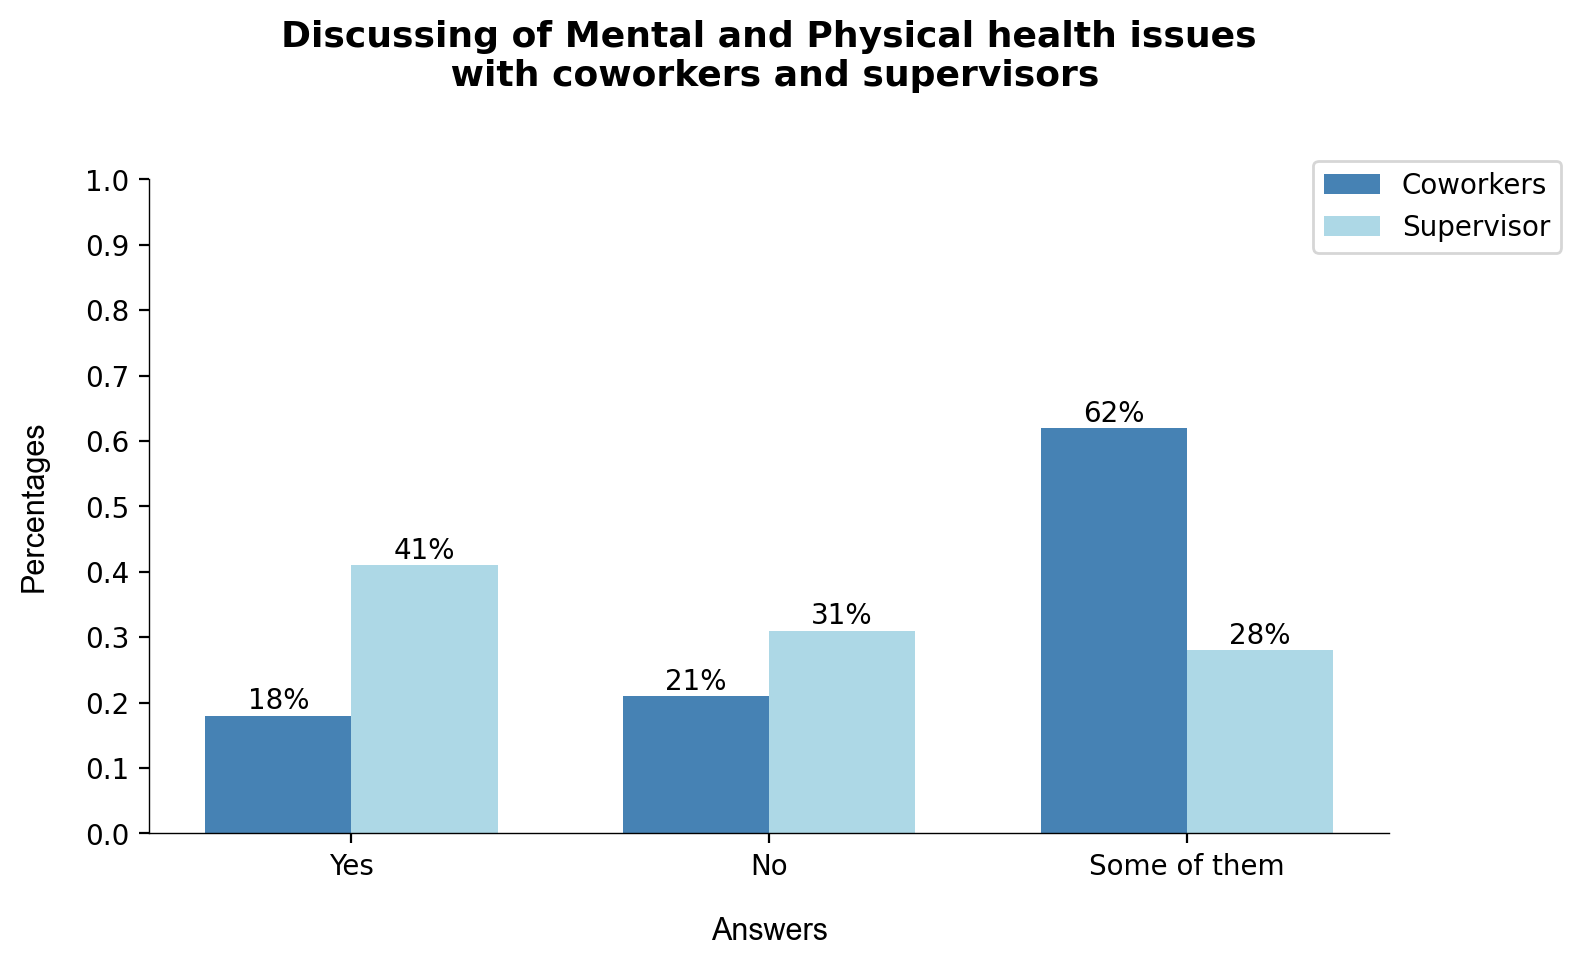

In [270]:
# Data
co = mental_health_df['coworkers'].value_counts().reindex(index= mental_health_df['coworkers'].value_counts().index[::-1])
sup = mental_health_df['supervisor'].value_counts()

labels = co.index.to_list()                 
counts_co = list(map(lambda x: round((x/tot_rows),2), co))
counts_sup = list(map(lambda x: round((x/tot_rows),2), sup))
  
# The label locations
x = np.arange(len(labels))  
width = 0.35  

# Plots
fig1, ax1 = plt.subplots(figsize =(8, 5))
ax1.bar(x - width/2, counts_co, width, color= 'steelblue', label= 'Coworkers')
ax1.bar(x + width/2, counts_sup, width, color= 'lightblue', label ='Supervisor')

# Labels, ticks 
ax1.set_xlabel("Answers", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_ylabel("Percentages", labelpad= 13.0, fontname="Arial", fontsize=11, fontweight = 'medium')
ax1.set_xticks(x, labels)
ax1.set_yticks(np.arange(0.0, 1.1, 0.1))

# Percentages
for p in ax1.patches:
   height = p.get_height() 
   ax1.annotate("{}%".format(round(height*100)), (p.get_x() + p.get_width() / 2, height+ 0.01), ha='center')

# Titles
ax1.set_title("Discussing of Mental and Physical health issues\n with coworkers and supervisors", fontsize= 13, fontweight= 'heavy', color = 'black', y=1.1, pad=10)

# Legend
ax1.legend(loc = 'upper right', bbox_to_anchor=(0.65, 0.55, 0.5, 0.5))

# Show
plt.tight_layout()
plt.show()

### Convert categorical variable into integers

Here i encode the categorical data, that are pretty much all the data of this dataset, since only the age column contains integers.

With the encoding it's possible to draw the heatmap of the dataset. The encoding could have been useful also in the previous analysis, but i preferred to keep the original labels to work more easily.

The heatmap is helpful to better understand the correlation of various features.

In [271]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
mh_df_econded = mental_health_df.copy()
mh_df_econded.drop(columns= ['country'], inplace= True)
object_cols = ['gender', 'self_employed', 'family_history','treatment', 'work_interfere','no_employees','remote_work','tech_company',
'benefits','care_options', 'wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence',
'coworkers','supervisor', 'mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(mental_health_df[col])
    mh_df_econded[col] = label_encoder.transform(mental_health_df[col])

### Heatmap

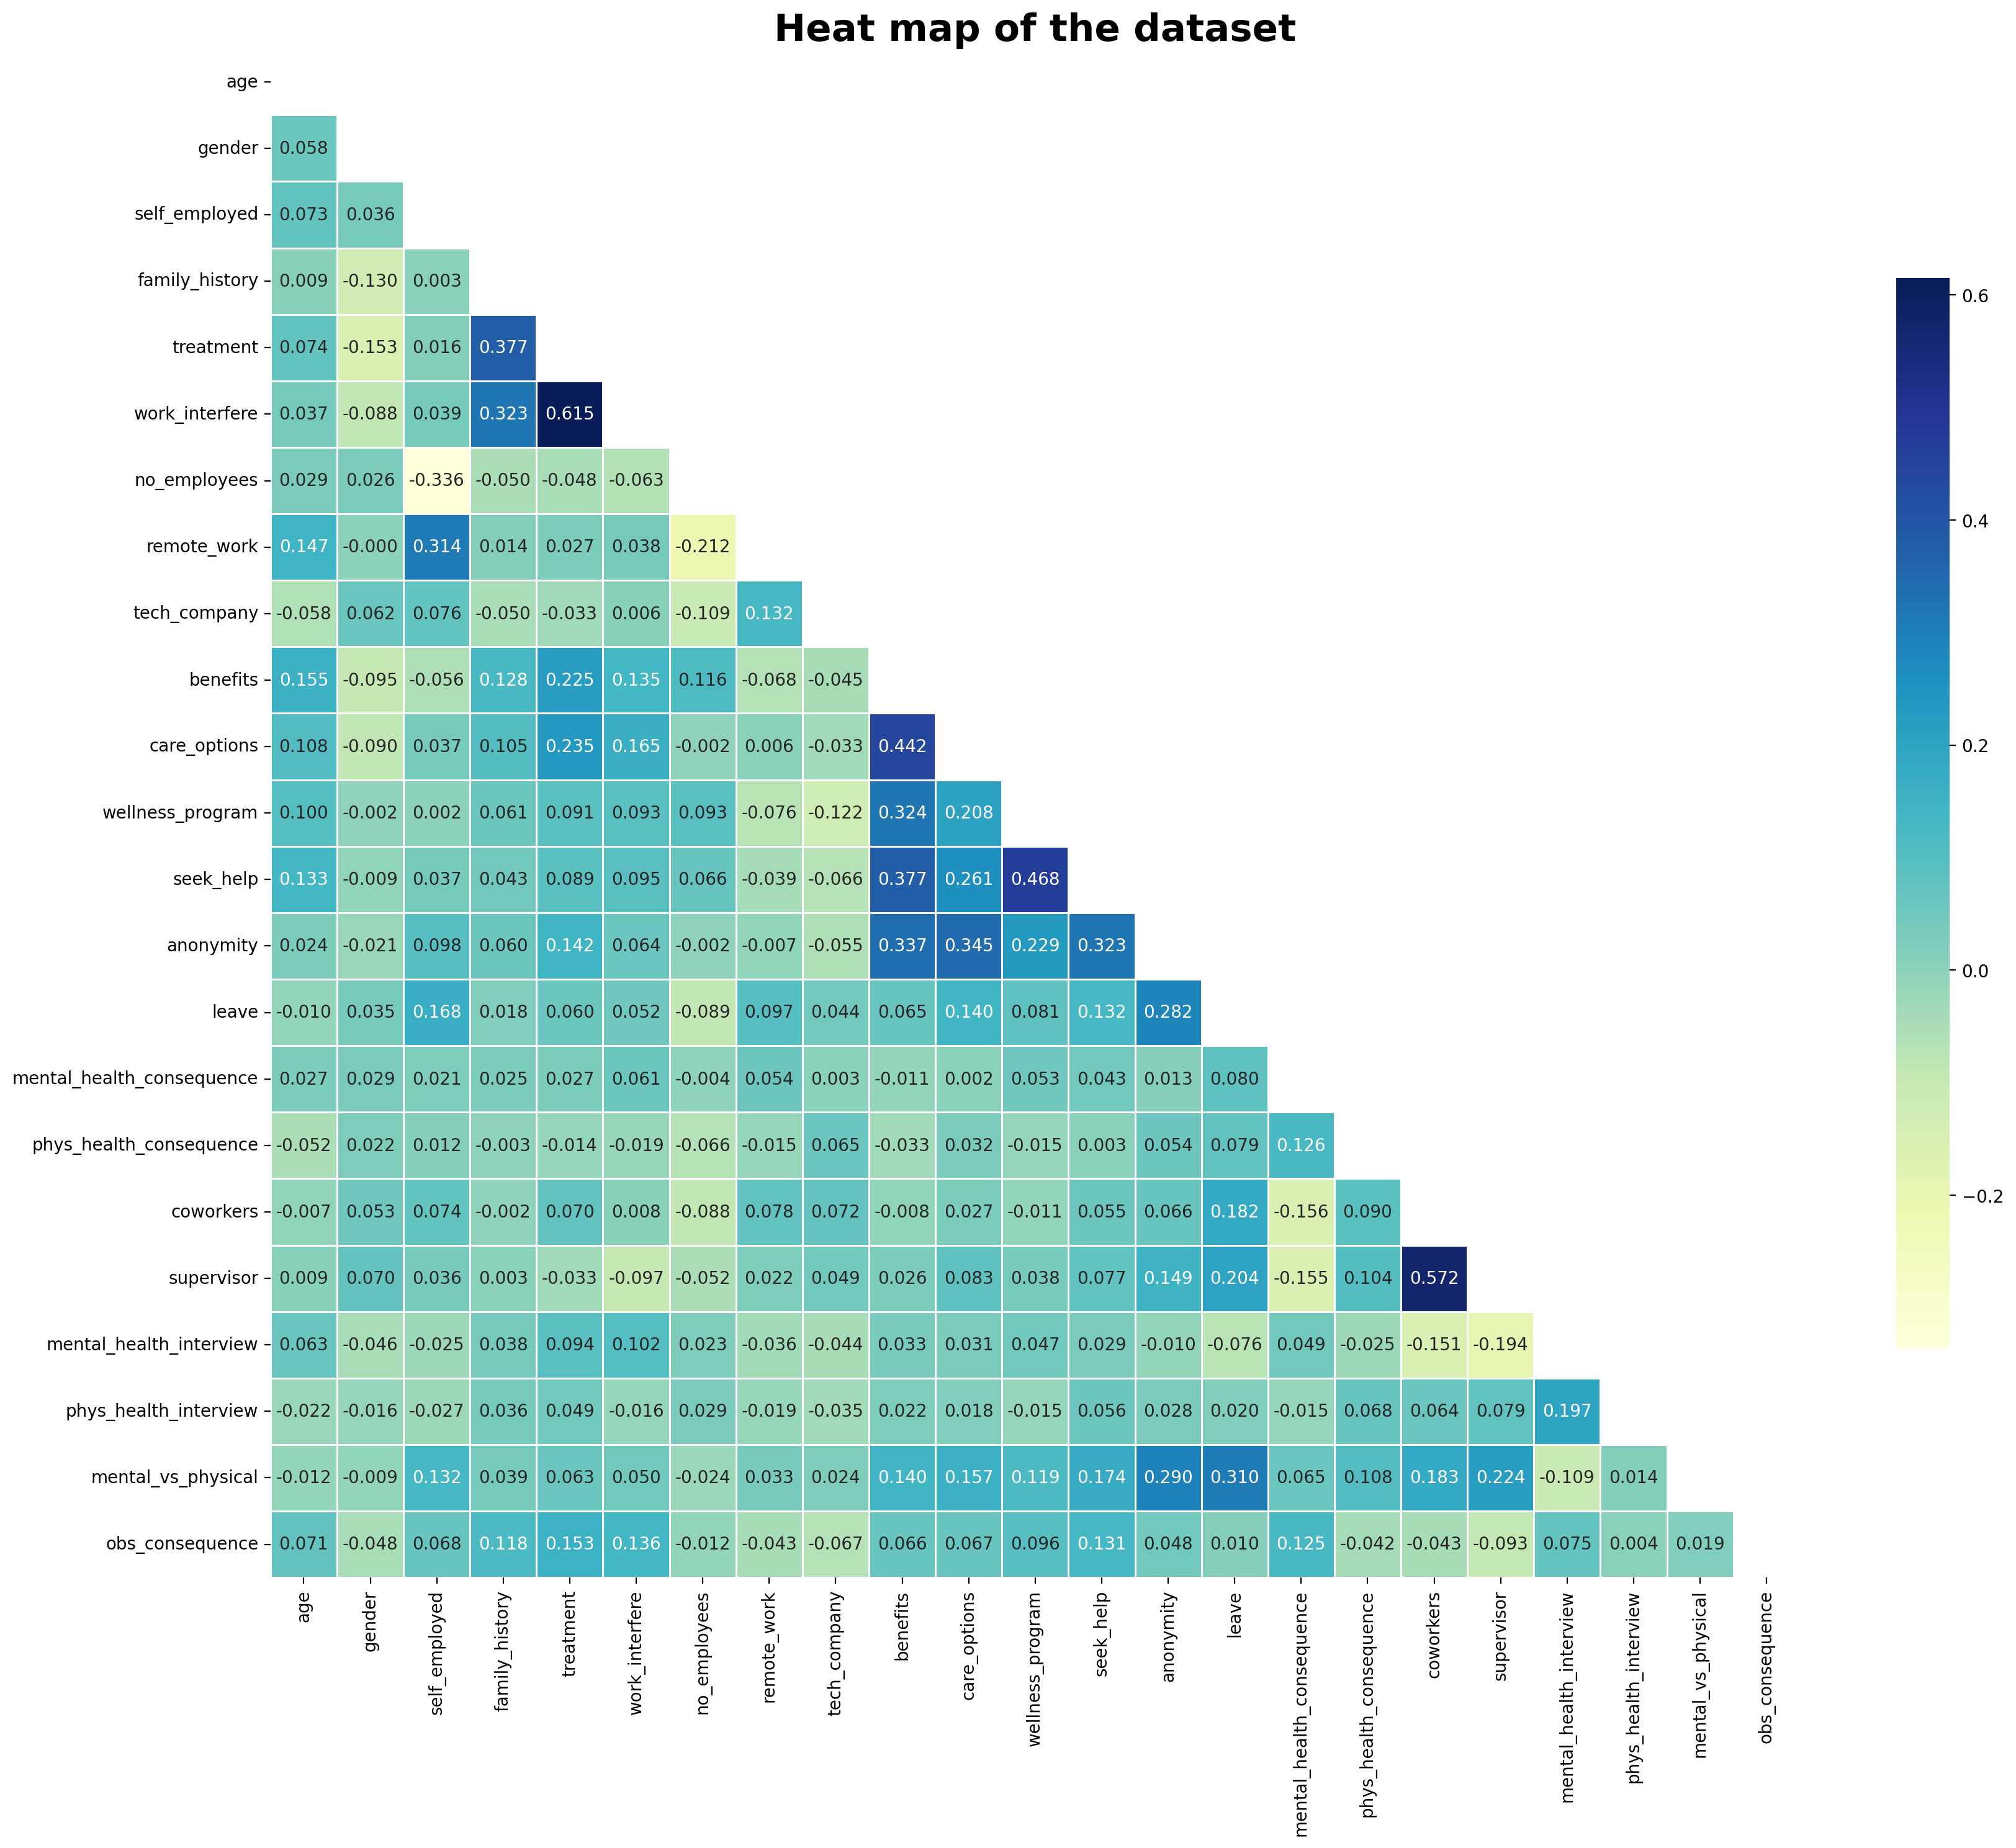

In [272]:
# Compute the correlation matrix
corr = mh_df_econded.corr(numeric_only= False)

# The mask for lower left triangle 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig1, ax1 = plt.subplots( figsize=(20, 16) )

# Heatmap
sb.heatmap(corr,  cmap = 'YlGnBu', annot = True, fmt=".3f", 
           linewidth=.5, cbar_kws={ 'orientation': 'vertical', 'shrink': 0.7 } , square=True, mask= mask,)
# Title
ax1.set_title("Heat map of the dataset", fontsize= 22, fontweight= 'heavy', color = 'black', pad= 0.7)

plt.show()


I use this scheme to interpret the values obtain:

<img src="/Users/emmatosato/Documents/UNI/Magistrale/Programming/Programming_Project/corr_values.png" alt="Correlation values" style="height: 223px; width:522px;"/>


([Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/#:~:text=A%20correlation%20coefficient%20of%20zero,between%20%E2%88%921%20and%20%2B1.))



There is **moderate positive** correlation between the attributes
- *treatment* and *work_interfere* for the reasons we have seen above 
- *coworkers* and *supervisor* that we can attribute to the similarity of the questions relative to this attributes

Then there is **low positive and negative** correlation between several attributes but the majority of the values present a **negligible correlation** 

## Models

In [317]:
# Imports 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### PCA

- PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

- One of the most broadly used of unsupervised algorithms.

- PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more

<br>

*Source*: Python Data Science Handbook

------------------------------------------------------------------------------------------------------------------------------------------------

In this case i have a lot of features and i would like to visualize the features that really matters in predicting mental health illness in the workplace.

In [320]:
# Standardize the data to have a mean of ~0 and a variance of 1
X = mh_df_econded.drop('treatment', axis=1)
X = StandardScaler().fit_transform(X)

In [321]:
# Create a PCA instance: pca
n_components = 20
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(X)

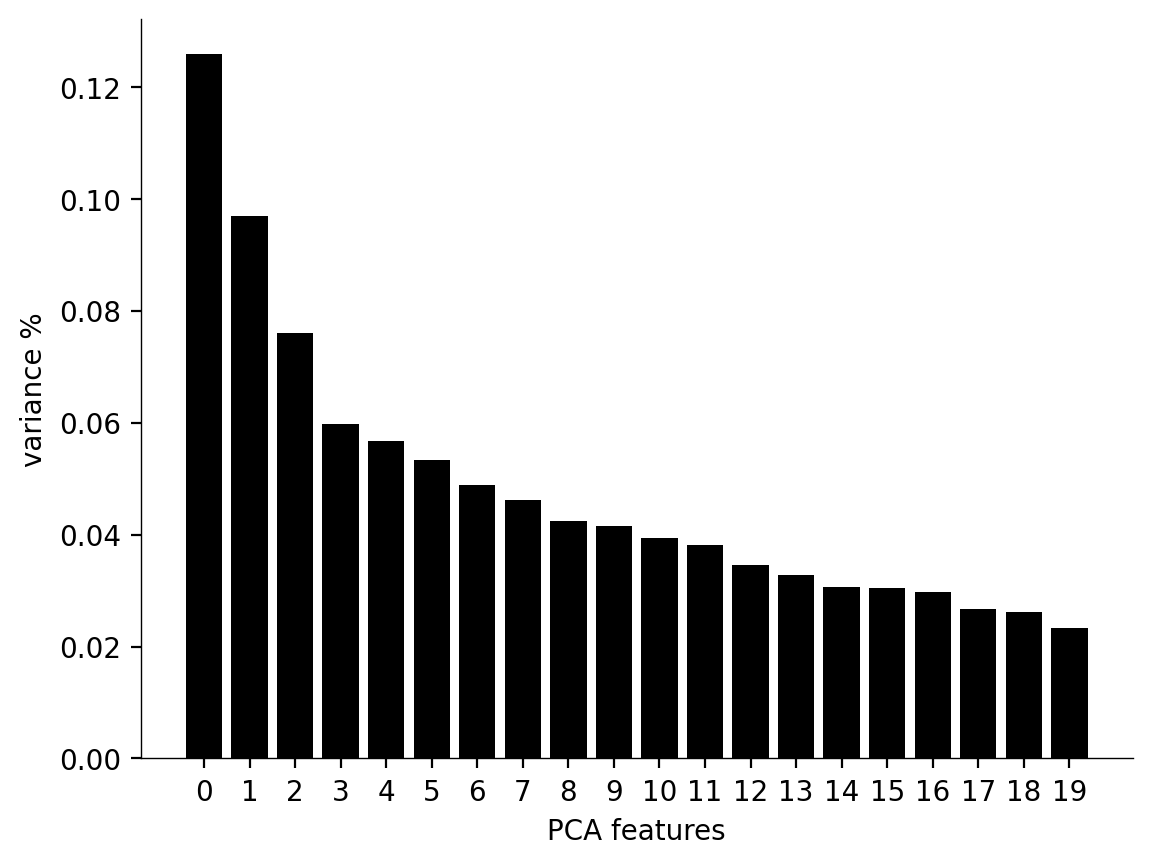

In [322]:
# Plot the explained variances in order to find the optimal number of components
features = range(n_components)                                         
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

The first three components explain the majority of the variance in our data and i will plot the first two

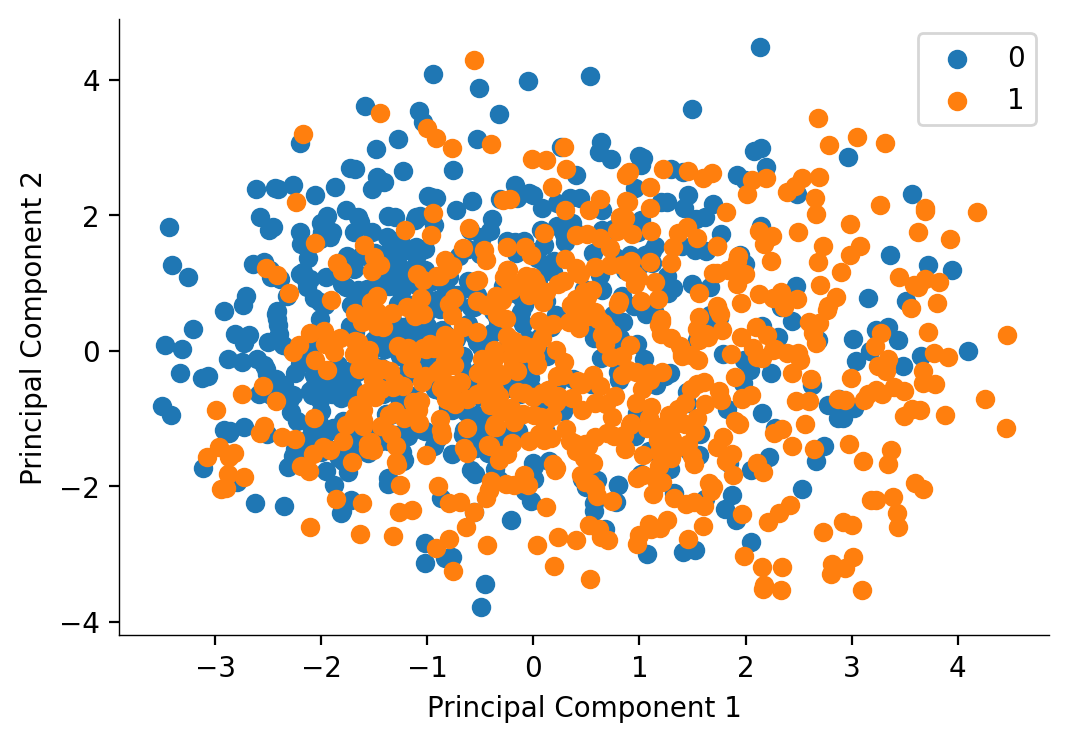

In [326]:
# PCA
n_components = 2
pca = PCA(n_components = n_components)
principal_components = pca.fit_transform(X)

# Save components to a DataFrame
principal_mh_df = pd.DataFrame(principal_components, columns = ['PC_' + str(x + 1) for x in range(n_components)])

# Plot without labels
plt.figure(figsize=(6,4))
targets = [0,1]
for target in targets:
    target_mask = mh_df_econded['treatment'] == target
    plt.scatter(principal_mh_df.loc[target_mask, 'PC_1'], principal_mh_df.loc[target_mask, 'PC_2'],
                label=target)
    # elementi = 0 ed elementi = 1

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


No clusters identified 

### Classification



I want to find the model which better predict if a person should be treated for a mental health condition according to the values in the dataset. 

Remeber that searching and being subjected to this type of treatment implies suffering of some kind of mental health disease, but it is also possible that someone have a mental health issue but he didn't search for a treatment, so the response *"No"* don't always indicate a healthy individual. By this point of view some labels could be misleading.

In [282]:
# Declare feature vector and target variable
X = mh_df_econded.drop('treatment', axis = 1)

y = mh_df_econded['treatment']

# Split the dataset in training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    



In [287]:
# Choosing the random state for the Ensemble methods

models = [DecisionTreeClassifier(), DecisionTreeClassifier(), AdaBoostClassifier(),GradientBoostingClassifier() ]
rnd_states = [1, 23, 42, 15, 56]

for model in models:
    a = pd.Series(index=rnd_states, dtype= float)
    rnd_states_collector =  pd.Series(index=models, dtype= float)
    for random_state in rnd_states:
        model = model
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        a.loc[random_state] = accuracy_score(y_pred, y_test)

    print('\nModel: ', model, '\nAccuracies', '\n' , a[::])
    #rnd_states_collector.loc[model] = a[a  == max(a)].index.values[0]


Model:  DecisionTreeClassifier() 
Accuracies 
 1     0.745020
23    0.776892
42    0.729084
15    0.768924
56    0.701195
dtype: float64

Model:  DecisionTreeClassifier() 
Accuracies 
 1     0.752988
23    0.760956
42    0.705179
15    0.784861
56    0.709163
dtype: float64

Model:  AdaBoostClassifier() 
Accuracies 
 1     0.784861
23    0.808765
42    0.800797
15    0.828685
56    0.800797
dtype: float64

Model:  GradientBoostingClassifier() 
Accuracies 
 1     0.772908
23    0.820717
42    0.804781
15    0.832669
56    0.776892
dtype: float64


In [288]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Gaussian Naive Bayes "
    "QDA"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(random_state=15),
    RandomForestClassifier(random_state=15),
    AdaBoostClassifier(random_state=15),
    GradientBoostingClassifier(random_state=15),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [314]:
accuracies = pd.Series(index = names, dtype=float)

# iterate over classifiers
for name, clf in zip(names, classifiers):
    model = clf
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.loc[name] = acc

accuracies.sort_values(ascending=True, inplace=True)
print(accuracies)


Decision Tree               0.713147
Gaussian Naive Bayes QDA    0.764940
Nearest Neighbors           0.768924
Naive Bayes                 0.776892
Linear SVM                  0.780876
AdaBoost                    0.800797
Random Forest               0.808765
dtype: float64


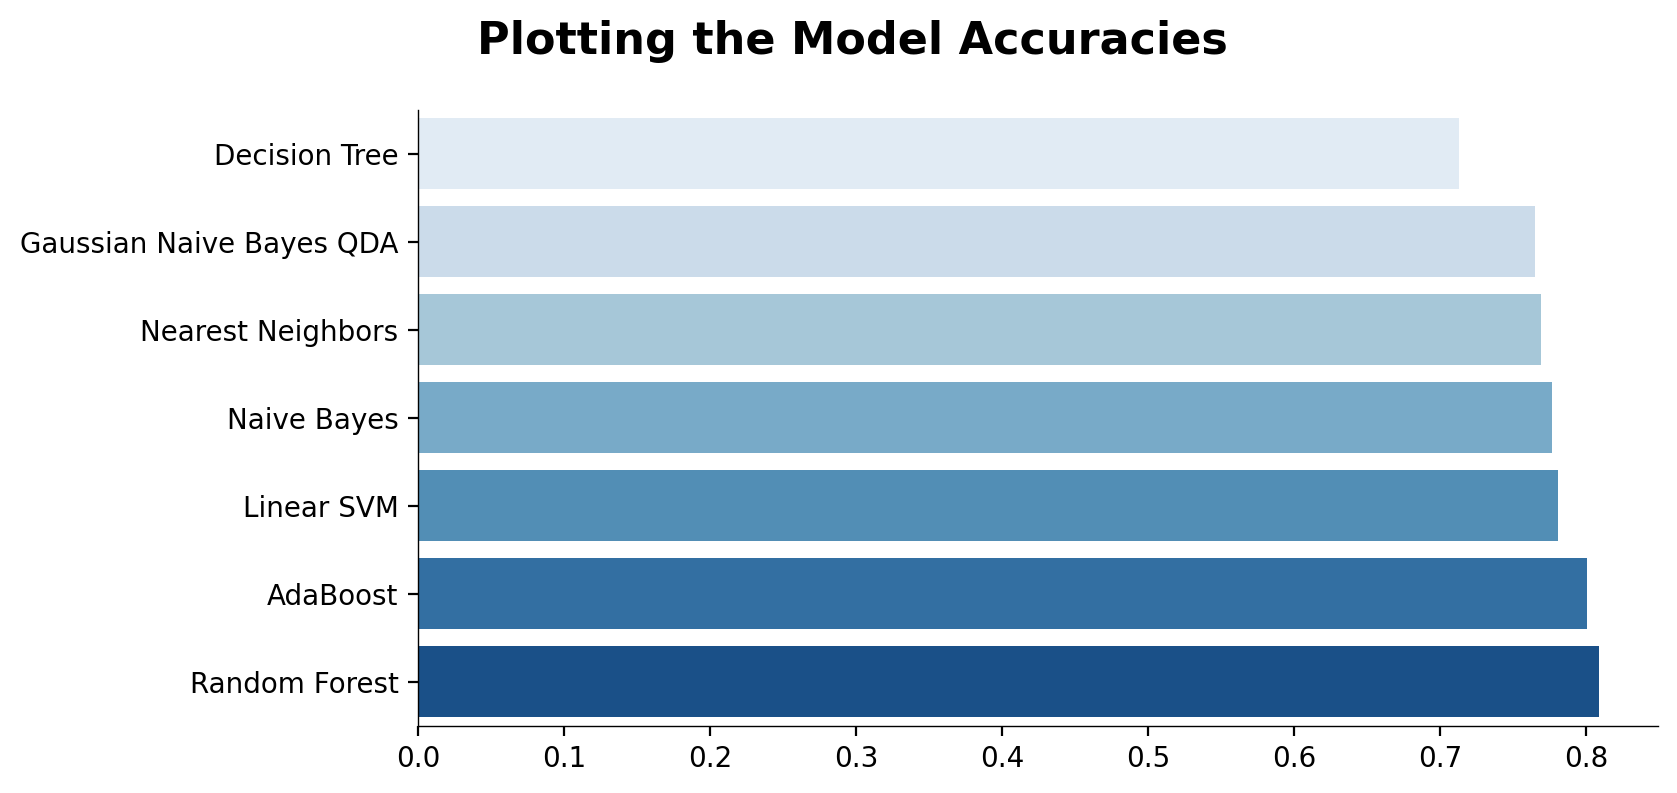

In [315]:
plt.figure(figsize = (8,4))
ax = sb.barplot(x = accuracies, y = accuracies.index, palette='Blues')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold", pad= 20, x = 0.35)
plt.show()